<a href="https://colab.research.google.com/github/mate7lord/-Audio-Processing-using-ML/blob/main/Financial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
from google.colab import files
uploaded = files.upload()

Saving Financials.csv to Financials (1).csv


In [47]:
df = pd.read_csv('Financials.csv')
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [48]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [49]:
df.columns = df.columns.str.strip()
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [50]:
def convert_parentheses(val):
    if isinstance(val, str):
        if val.startswith('(') and val.endswith(')'):
            return -float(val[1:-1].replace(',', ''))
        else:
            return float(val)
    else:
        return val

In [51]:
columns_to_clean = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

In [52]:
for col in columns_to_clean:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('$', '').str.replace('-', '').str.replace(',', '').str.strip()
        df[col] = df[col].replace('', np.nan).apply(convert_parentheses).astype(float)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display the cleaned data
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,2014-01-06,6,June,2014


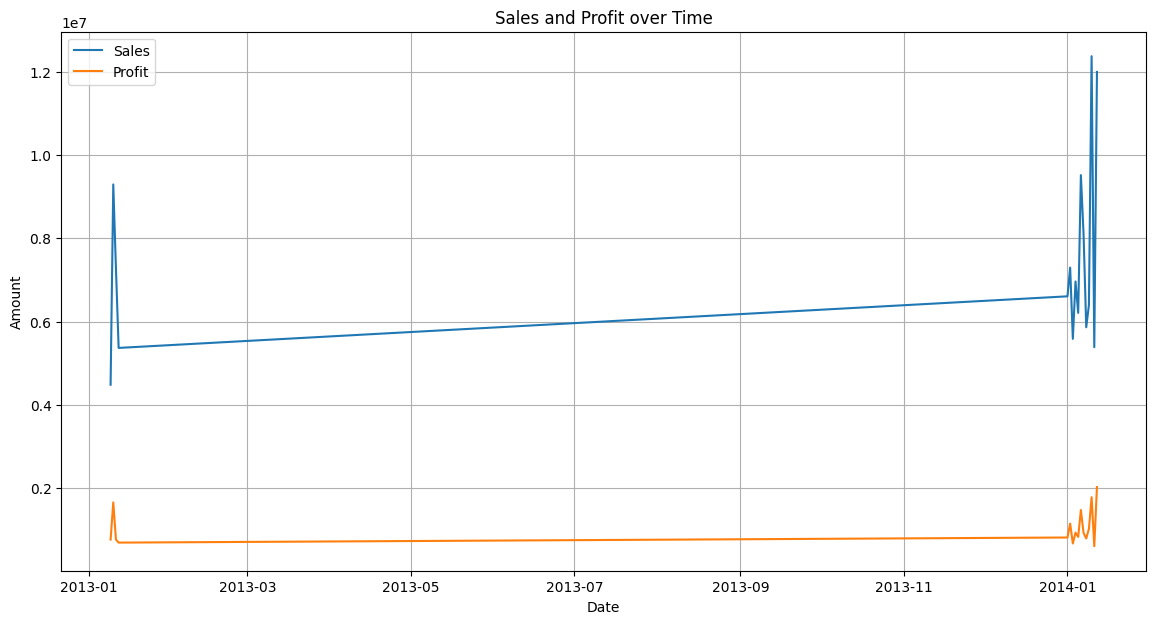

In [53]:
# Group data by Date
grouped_df = df.groupby('Date').agg({'Sales': 'sum', 'Profit': 'sum'})

# Plot Sales and Profit over time
plt.figure(figsize=(14, 7))
plt.plot(grouped_df.index, grouped_df['Sales'], label='Sales')
plt.plot(grouped_df.index, grouped_df['Profit'], label='Profit')
plt.title('Sales and Profit over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()

The figure shows sales and profit data over time. We can see that sales have generally increased over time, while profits have been fairly stable. However, there are some sharp peaks and valleys in sales, indicating that there are some months with very high or low sales. There are also some sharp peaks and valleys in profits, but not as sharp as those in sales. This may indicate that the company was able to manage its profits better than its sales. Overall, this figure shows that the company is experiencing steady growth in sales and profits, but there are some fluctuations worth noting.

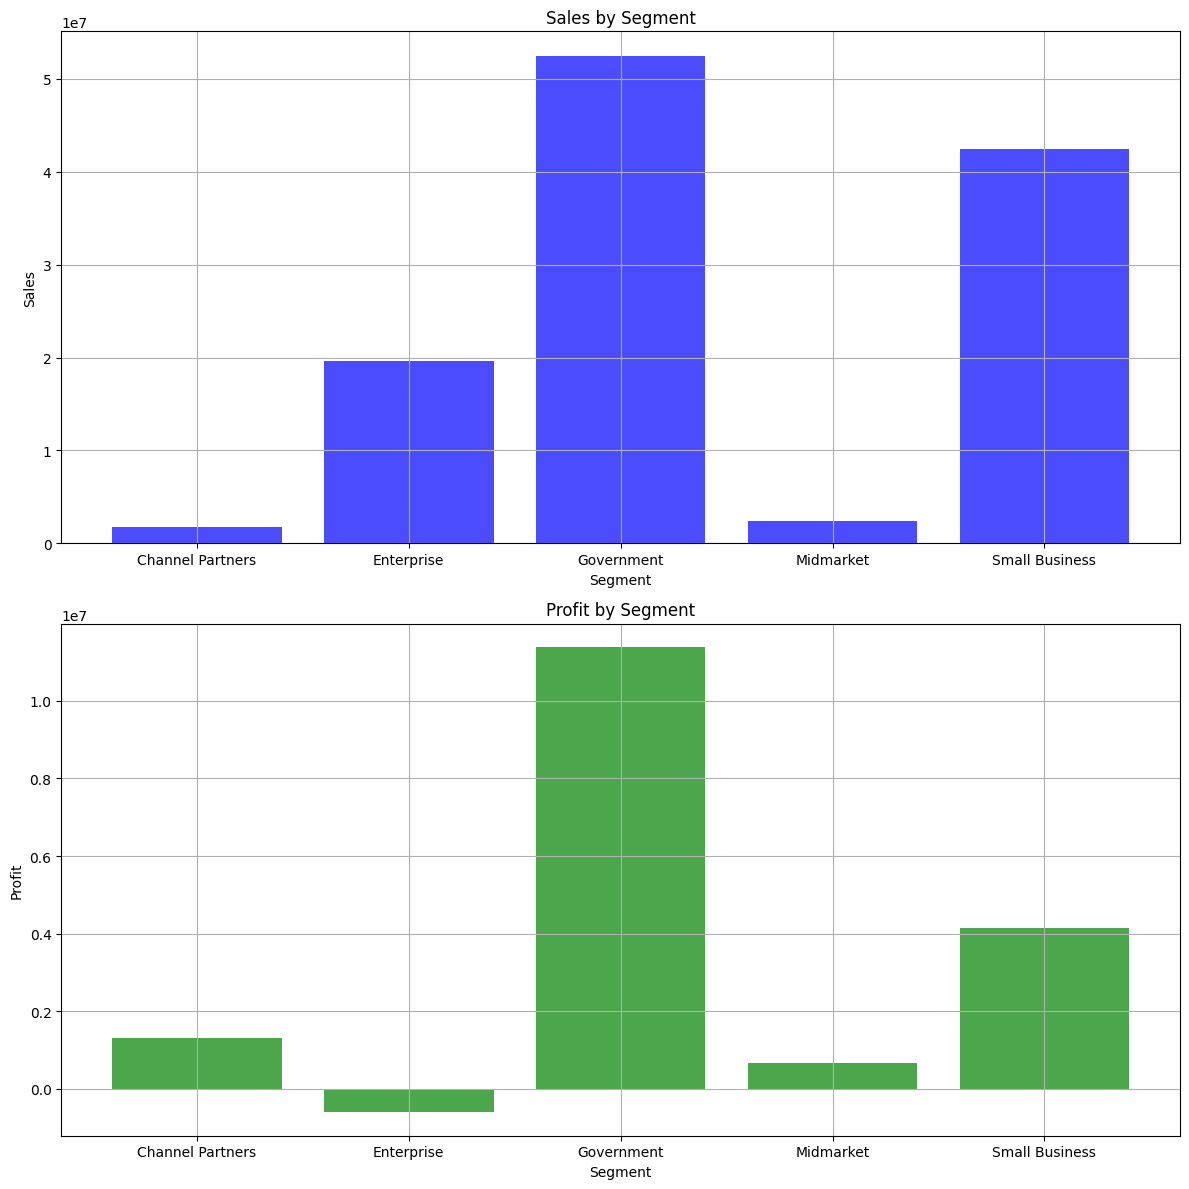

In [54]:
# Group data by Segment
grouped_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'})

# Plot Sales and Profit by Segment
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].bar(grouped_segment.index, grouped_segment['Sales'], color='blue', alpha=0.7)
ax[0].set_title('Sales by Segment')
ax[0].set_xlabel('Segment')
ax[0].set_ylabel('Sales')
ax[0].grid()

ax[1].bar(grouped_segment.index, grouped_segment['Profit'], color='green', alpha=0.7)
ax[1].set_title('Profit by Segment')
ax[1].set_xlabel('Segment')
ax[1].set_ylabel('Profit')
ax[1].grid()

plt.tight_layout()
plt.show()

The first graph displays sales by segment, and the second graph displays profits by segment. Both graphs have the same X-axis, which is segments, but different Y-axes. The first graph has a Y-axis for sales, and the second graph has a Y-axis for profits.

The sales bar graph shows that the highest sales come from the government segment, and the lowest sales come from the channel partner segment. The profit bar graph shows that the highest profit also comes from the government segment, and the lowest profit comes from the enterprise segment.

Overall, these graphs show that the government segment is the most profitable segment, generating significantly higher sales and profits than the other segments.

Translated with DeepL.com (free version)

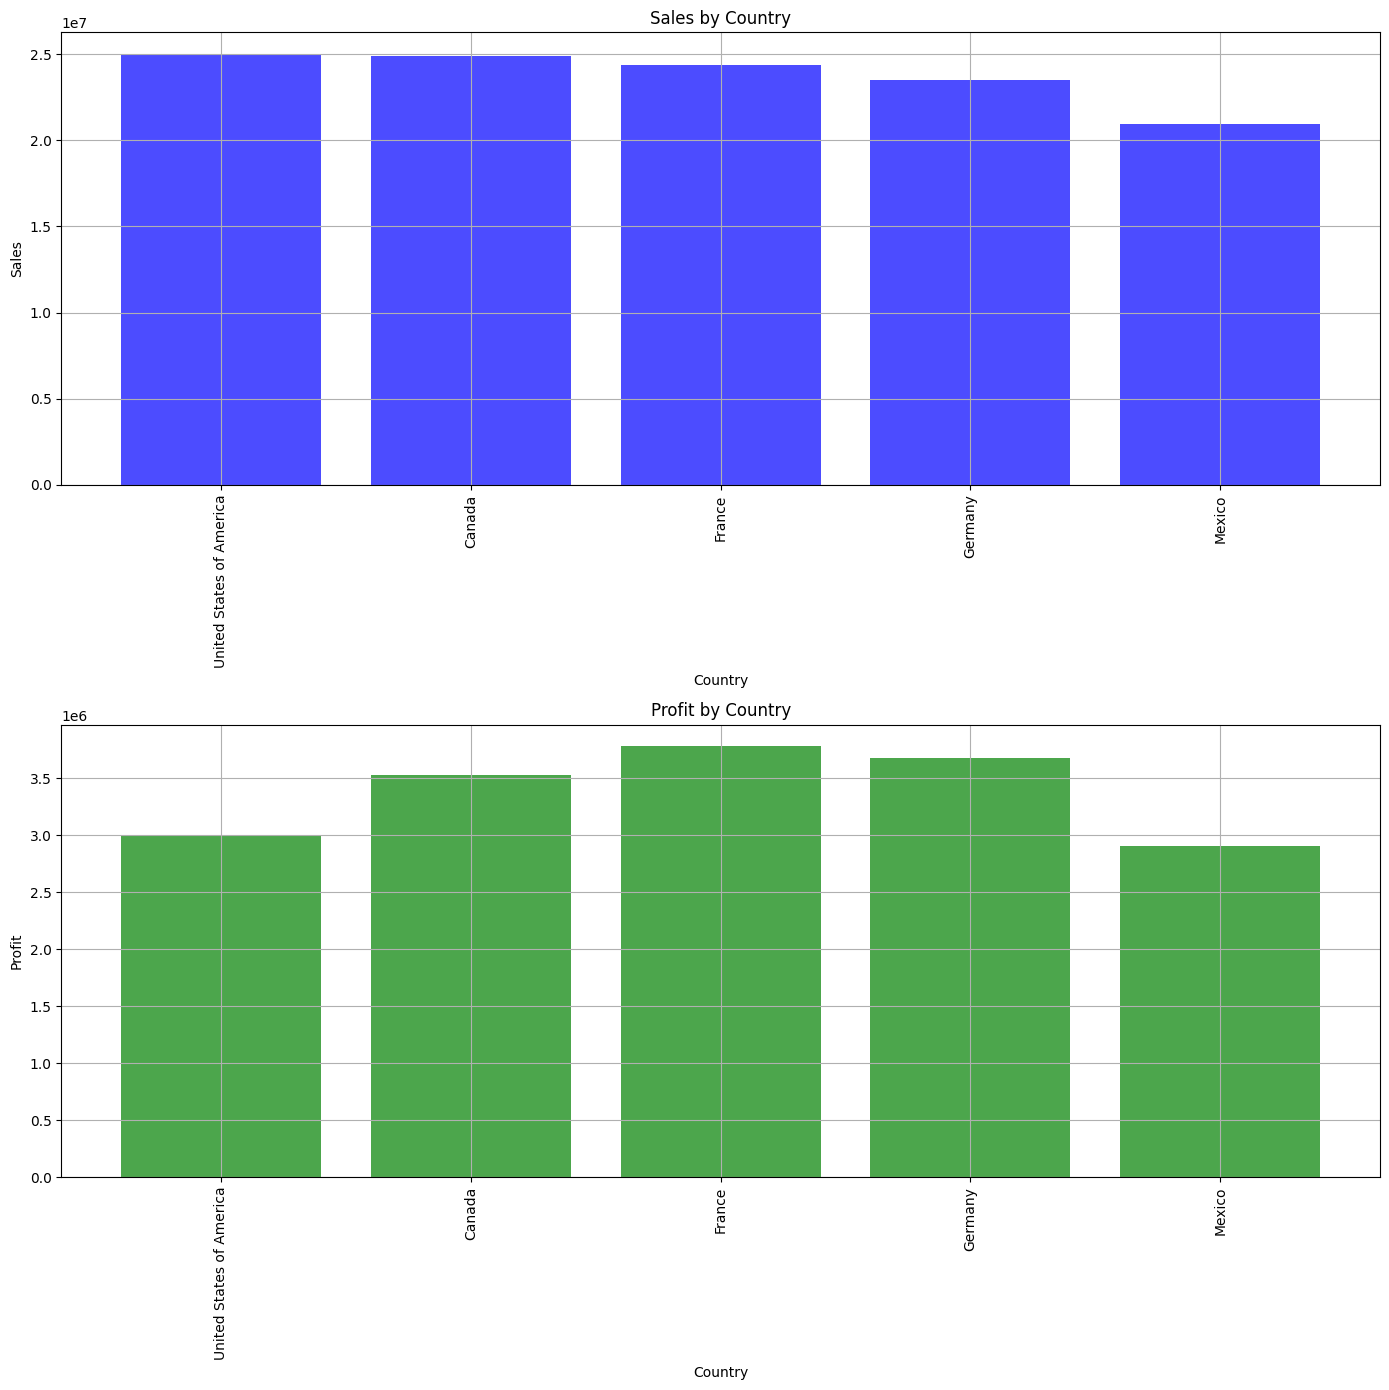

In [55]:
# Group data by Country
grouped_country = df.groupby('Country').agg({'Sales': 'sum', 'Profit': 'sum'})

# Sort data by Sales
grouped_country = grouped_country.sort_values(by='Sales', ascending=False)

# Plot Sales and Profit by Country
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

ax[0].bar(grouped_country.index, grouped_country['Sales'], color='blue', alpha=0.7)
ax[0].set_title('Sales by Country')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Sales')
ax[0].tick_params(axis='x', rotation=90)
ax[0].grid()

ax[1].bar(grouped_country.index, grouped_country['Profit'], color='green', alpha=0.7)
ax[1].set_title('Profit by Country')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Profit')
ax[1].tick_params(axis='x', rotation=90)
ax[1].grid()

plt.tight_layout()
plt.show()

The first chart shows the sales by country, and the second chart shows the profit by country. The sales are highest in France, followed by Germany and then Mexico. The profit is highest in France, followed by Germany, then the United States, then Canada and lastly Mexico.

In [56]:
df['Discounts'].describe()

,Discounts
count,647.000000
mean,14227.586198
std,23562.833079
min,18.410000
25%,1061.000000
50%,3108.000000
75%,18809.250000
max,149677.500000


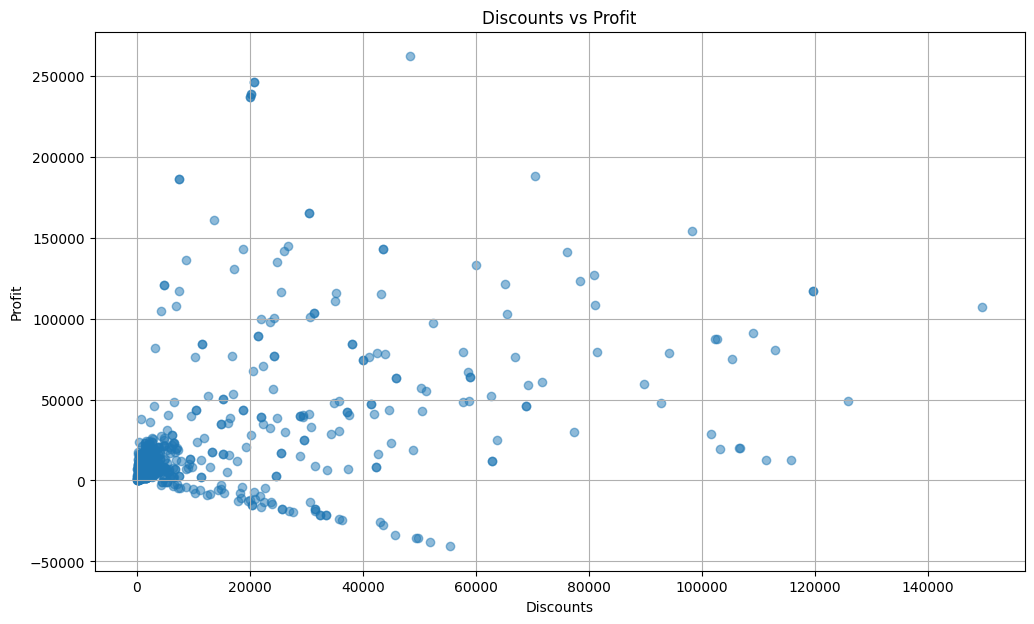

In [57]:
# Create a scatter plot of 'Discounts' vs 'Profit'
plt.figure(figsize=(12, 7))
plt.scatter(df['Discounts'], df['Profit'], alpha=0.5)
plt.title('Discounts vs Profit')
plt.xlabel('Discounts')
plt.ylabel('Profit')
plt.grid()
plt.show()

Concentration of Points at Low Discount Rate : There is a dense cluster of data points around the lower discount range (between 0 and 20,000). This suggests that most transactions involve smaller discounts.

Profit Trend : For lower discounts (below 20,000), the profits range from negative values to high profits. This shows that smaller discounts do not necessarily correlate with consistently higher or lower profits.
As the discount increases to over 20,000, profits tend to vary greatly but seem to show a slight downward trend, especially when the discount becomes very large (around 80,000+). Many points here seem to result in smaller or even negative profits.

Atypical values : There are some atypical values where high discounts correlate with very high profits. These may be exceptional cases where large discounts lead to a significant increase in profit.

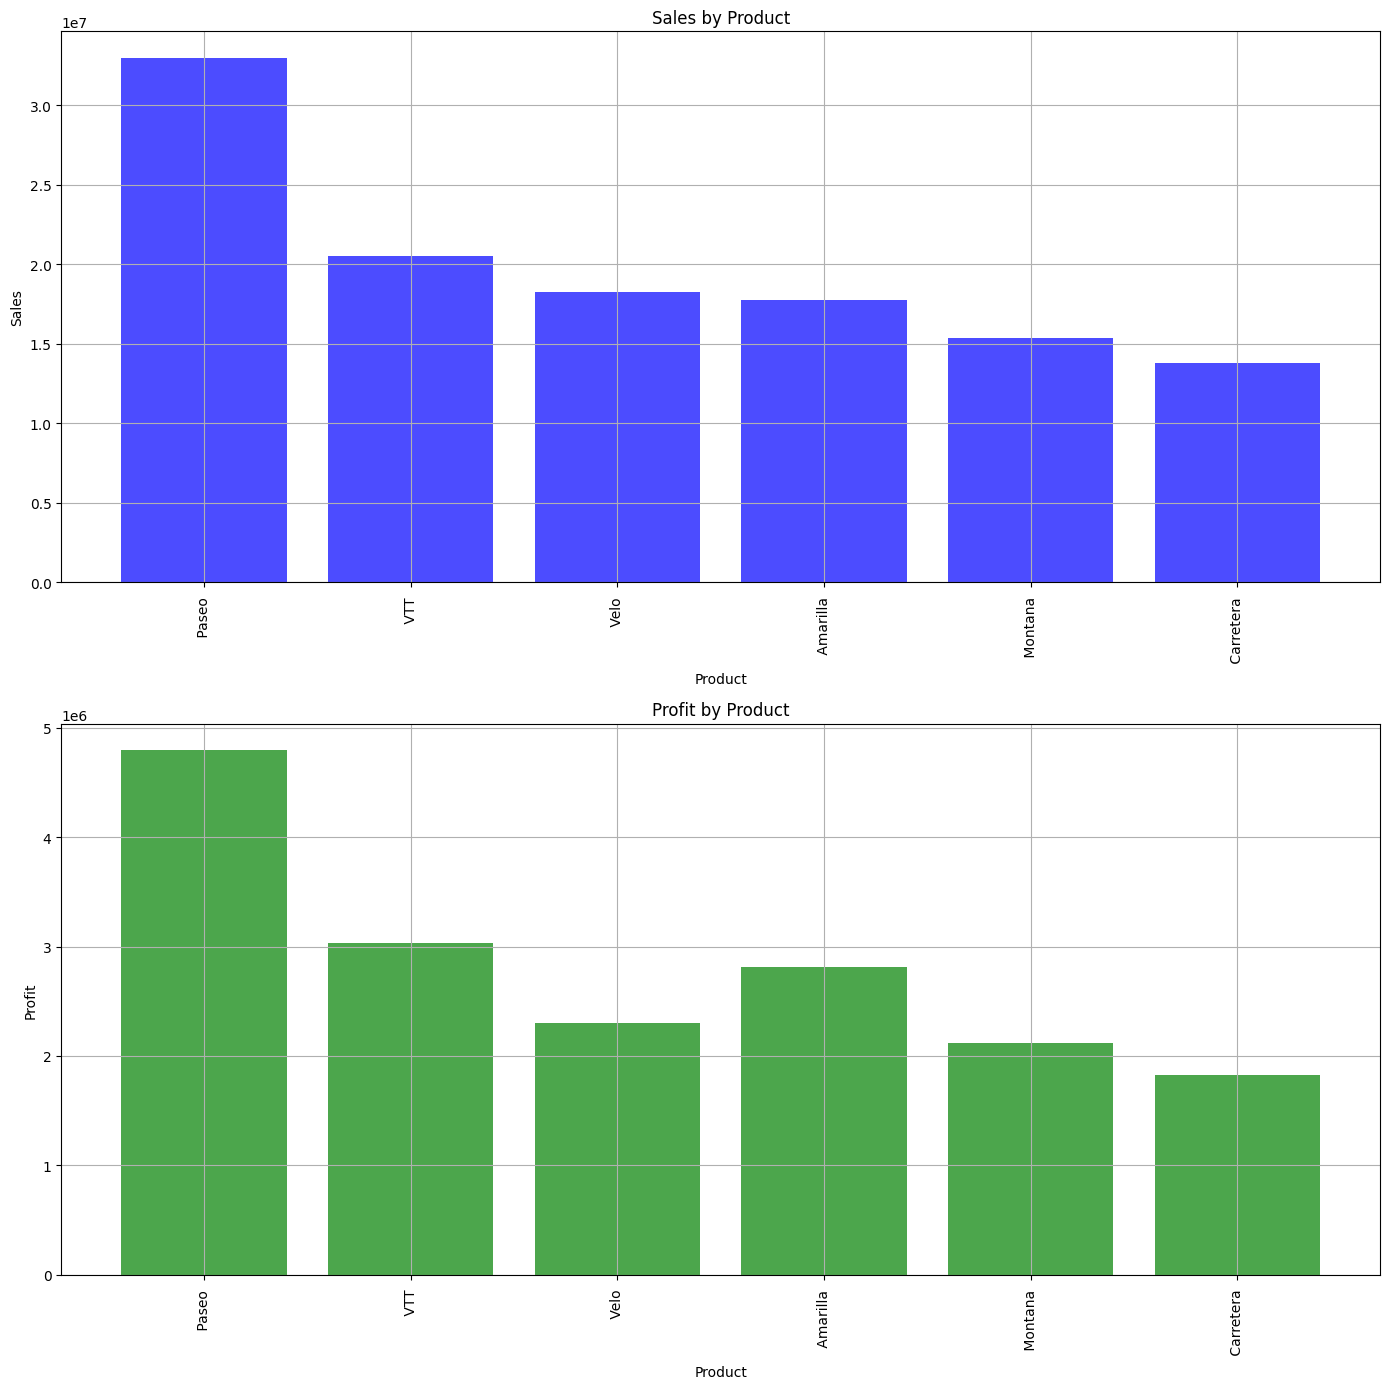

In [58]:
# Group data by Product
grouped_product = df.groupby('Product').agg({'Sales': 'sum', 'Profit': 'sum'})

# Sort data by Sales
grouped_product = grouped_product.sort_values(by='Sales', ascending=False)

# Plot Sales and Profit by Product
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

ax[0].bar(grouped_product.index, grouped_product['Sales'], color='blue', alpha=0.7)
ax[0].set_title('Sales by Product')
ax[0].set_xlabel('Product')
ax[0].set_ylabel('Sales')
ax[0].tick_params(axis='x', rotation=90)
ax[0].grid()

ax[1].bar(grouped_product.index, grouped_product['Profit'], color='green', alpha=0.7)
ax[1].set_title('Profit by Product')
ax[1].set_xlabel('Product')
ax[1].set_ylabel('Profit')
ax[1].tick_params(axis='x', rotation=90)
ax[1].grid()

plt.tight_layout()
plt.show()

1. Top Chart: Sales by Product
*   Pasco shows the highest sales, surpassing 30 million.
*   VTT and Velo follow with sales between 20 and 25 million.
*   Amarilla, Montana, and Carretera have lower sales, all ranging between 15 and 20 million, with Carretera having the lowest sales.

2. Bottom Chart : Profit by Product
*   Pasco also leads in profit, generating about 5 million.
*   VTT comes next with a profit around 3.5 million.
*   Amarilla, Velo, Montana, and Carretera have lower profits, with Carretera generating the lowest profit.

Key Insights : Pasco is the top performer in both sales and profit.
Carretera has the lowest sales and profit, indicating poor performance.
VTT and Amarilla have moderate performance, showing relatively strong profits compared to their sales.

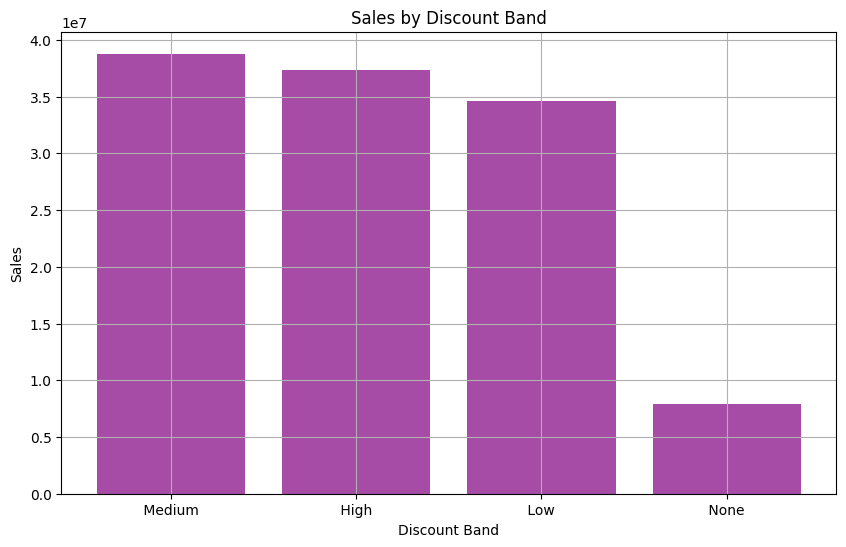

In [59]:
# Group data by Discount Band
grouped_discount = df.groupby('Discount Band').agg({'Sales': 'sum'})

# Sort data by Sales
grouped_discount = grouped_discount.sort_values(by='Sales', ascending=False)

# Plot Sales by Discount Band
plt.figure(figsize=(10, 6))
plt.bar(grouped_discount.index, grouped_discount['Sales'], color='purple', alpha=0.7)
plt.title('Sales by Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Sales')
plt.grid()
plt.show()

1.   Sales with Medium, High, and Low discounts are almost the same, around 35 million (3.5 x 10^7). This shows that providing discounts, whether medium, high, or low, gives comparable sales results.
2.   Sales without discount (None) are much lower, only about 10 million. This means that sales without discounts decreased significantly compared to sales with discounts.

In conclusion, any discount has a positive impact on sales, while no discount causes a drastic decrease in the number of sales.






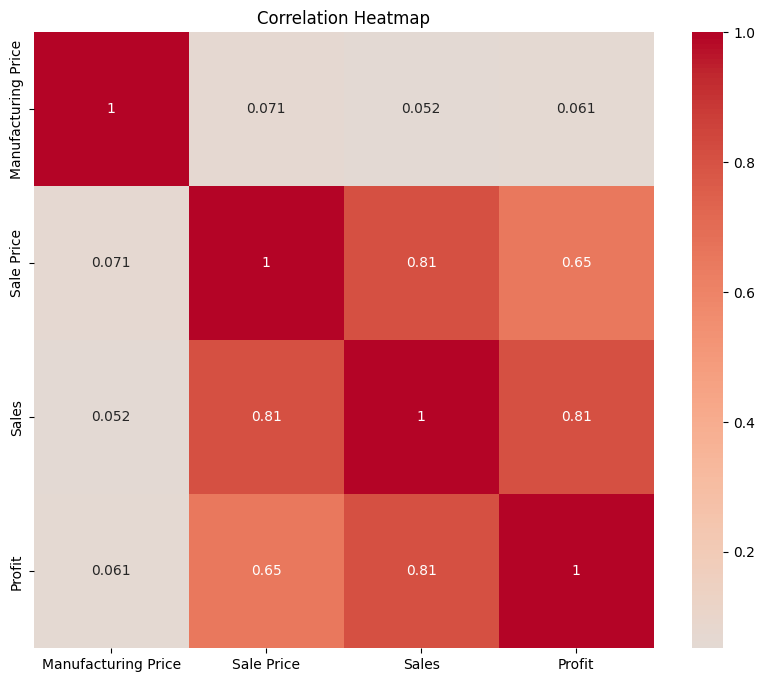

In [60]:
# Calculate correlation
correlation = df[['Manufacturing Price', 'Sale Price', 'Sales', 'Profit']].corr()

# Plot heatmap of correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

This shows a heatmap of the correlation between several variables: Manufacturing Price, Sale Price, Sales, and Profit.Correlation values are represented by a number in each cell as well as the intensity of the colour, with darker red representing high positive correlation (close to 1) and lighter colours representing lower correlation (close to 0).Here is an explanation of the relationship between the variables:


1.   Manufacturing Price : Does not have a strong correlation with other variables.
It has a very low correlation with Sale Price (0.071), Sales (0.052), and Profit (0.061), which means that the manufacturing price does not really affect the selling price, sales, or profit directly.
2.   Sale Price : High correlation with Sales (0.81) and Profit (0.65). This suggests that higher selling prices tend to increase the amount of sales and profit, although the relationship with profit is slightly weaker than with sales.
3.   Sales : Highly correlated with Profit (0.81). This means that the higher the sales, the greater the profit, which is a very logical relationship in business.
4.   Profit : Has a strong relationship with Sales (0.81) and a moderate correlation with Sale Price (0.65). This means that profit is highly dependent on sales volume and product selling price, but manufacturing price has no significant effect.

Conclusion : Manufacturing Price does not significantly affect other outcomes.
Sales and Profit have the strongest relationship, indicating that increased sales are highly correlated with increased profits. Sale Price plays an important role in increasing sales and profits, but the correlation with profits is not as strong as sales. In other words, strategies that focus on increasing sales will tend to have the greatest impact on profits.

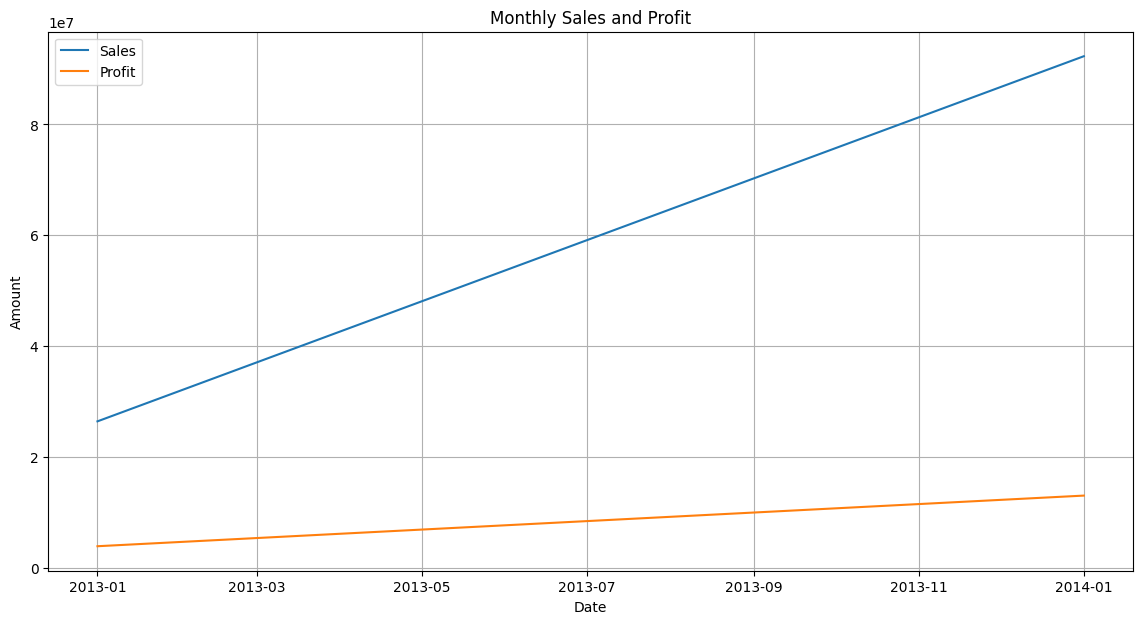

In [61]:
# Create a new dataframe with total monthly sales and profit
monthly_data = df.groupby([df['Date'].dt.year, df['Date'].dt.month]).agg({'Sales': 'sum', 'Profit': 'sum'})
monthly_data.index.names = ['Year', 'Month']
monthly_data.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_data['Year-Month'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(day=1))

# Plot monthly sales and profit
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Year-Month'], monthly_data['Sales'], label='Sales')
plt.plot(monthly_data['Year-Month'], monthly_data['Profit'], label='Profit')
plt.title('Monthly Sales and Profit')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()

The X-axis shows time (from January 2013 to January 2014), illustrating changes over time. The Y-axis shows the amount of sales and profits in units close to 10^7 (tens of millions).
**Interpretation :**
*   Sales (Blue Line) : Sales saw a consistent increase throughout the year. From the beginning of 2013 to the end of 2013, the value of sales rose steadily from around 4 million to over 8 million. This indicates a strong growth in sales during this period.
*   Profit (Orange Line) : Profits also increased from the beginning of 2013 to the end of 2013, but at a slower pace than sales. At the beginning of 2013, profits were around 1 million and increased to over 2 million by the end of 2013.

**Analysis :**
*   Sales are increasing faster than profits, which could indicate that despite the increase in revenue, profit margins may remain small or there are increased costs associated with sales.
*   The sales line being much steeper than the profit line also indicates that although sales volumes are increasing sharply, profits are not increasing proportionally.

Overall, the business shows good growth in sales, but further analysis of operational or cost efficiencies is needed to improve profitability.






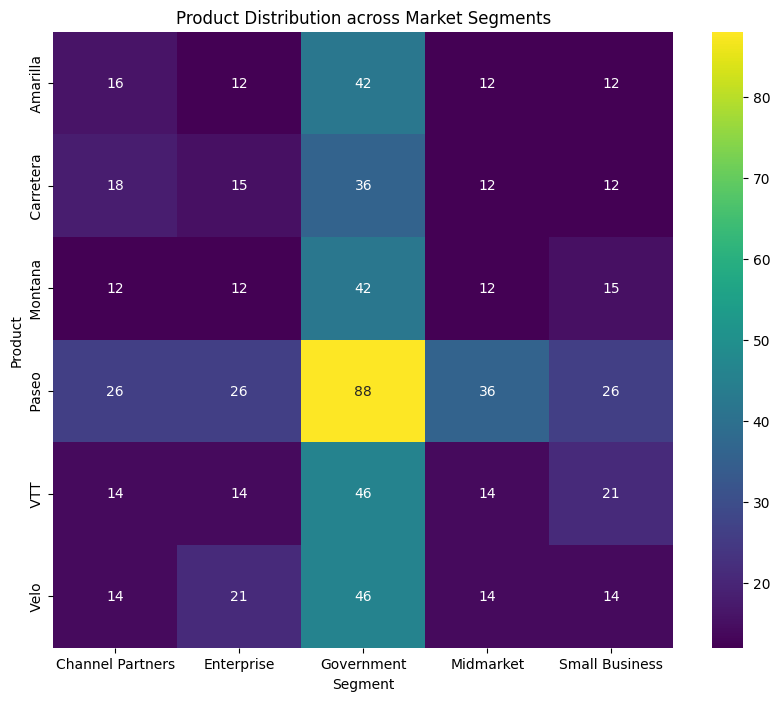

In [62]:
# Create a cross-tabulation of 'Product' and 'Segment'
product_segment_crosstab = pd.crosstab(df['Product'], df['Segment'])

# Plot a heatmap of the cross-tabulation
plt.figure(figsize=(10, 8))
sns.heatmap(product_segment_crosstab, annot=True, fmt='d', cmap='viridis')
plt.title('Product Distribution across Market Segments')
plt.show()

**Observations :**
*   Product 'Paseo' has the highest count (88) in the Government Segment.
*   The Government Segment generally has higher values across different products compared to other segments.
*   Most products have similar distribution across segments except for notable differences, such as a spike for the 'Paseo' product in the Government Segment.









<ipython-input-63-3d57158b173f>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(average_prices['Manufacturing Price'][i], average_prices['Sale Price'][i], label=product)


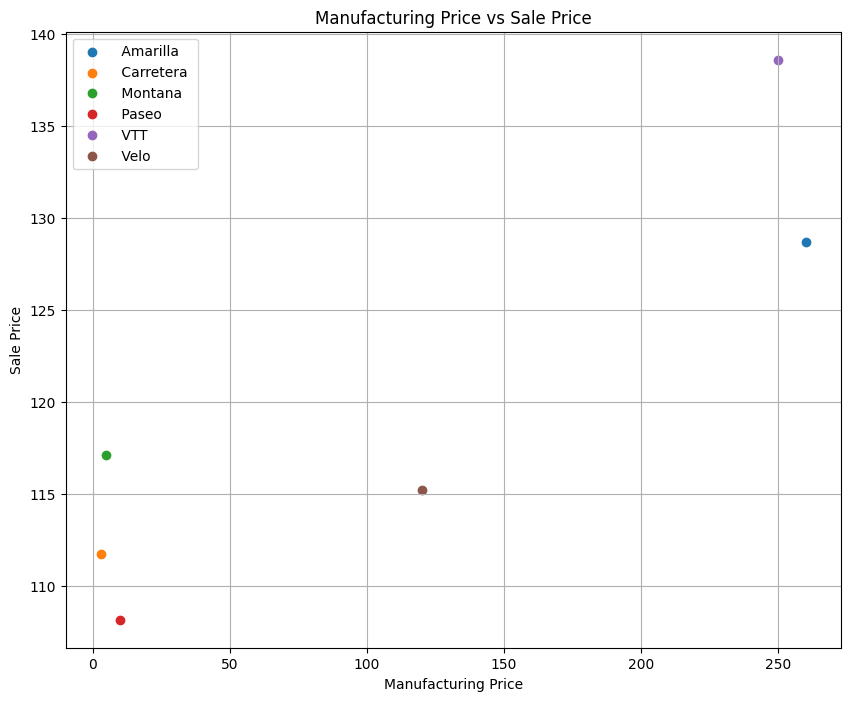

In [63]:
# Calculate average 'Manufacturing Price' and 'Sale Price' for each product
average_prices = df.groupby('Product').agg({'Manufacturing Price': 'mean', 'Sale Price': 'mean'})

# Create a scatter plot of 'Manufacturing Price' vs 'Sale Price'
plt.figure(figsize=(10, 8))
for i, product in enumerate(average_prices.index):
    plt.scatter(average_prices['Manufacturing Price'][i], average_prices['Sale Price'][i], label=product)
plt.title('Manufacturing Price vs Sale Price')
plt.xlabel('Manufacturing Price')
plt.ylabel('Sale Price')
plt.legend()
plt.grid()
plt.show()

*   Product VTT (purple point) has the highest manufacturing price (around 260) and also the highest sale price (around 135).
*   Amarilla (blue point) has a lower manufacturing price (around 250) but a sale price of around 130.
*   Products like Montana (green) and Carretera (orange) have relatively low manufacturing prices (close to zero), with sale prices around 115 and 110, respectively.
*   Paseo (red point) has the lowest values on both axes, with a manufacturing price close to zero and a sale price of around 110.

The scatter plot highlights how sale prices are related to manufacturing costs for different products. In general, products with higher manufacturing prices tend to have higher sale prices, but there are variations, such as the product "Amarilla," which has a high manufacturing price but a lower sale price compared to "VTT."


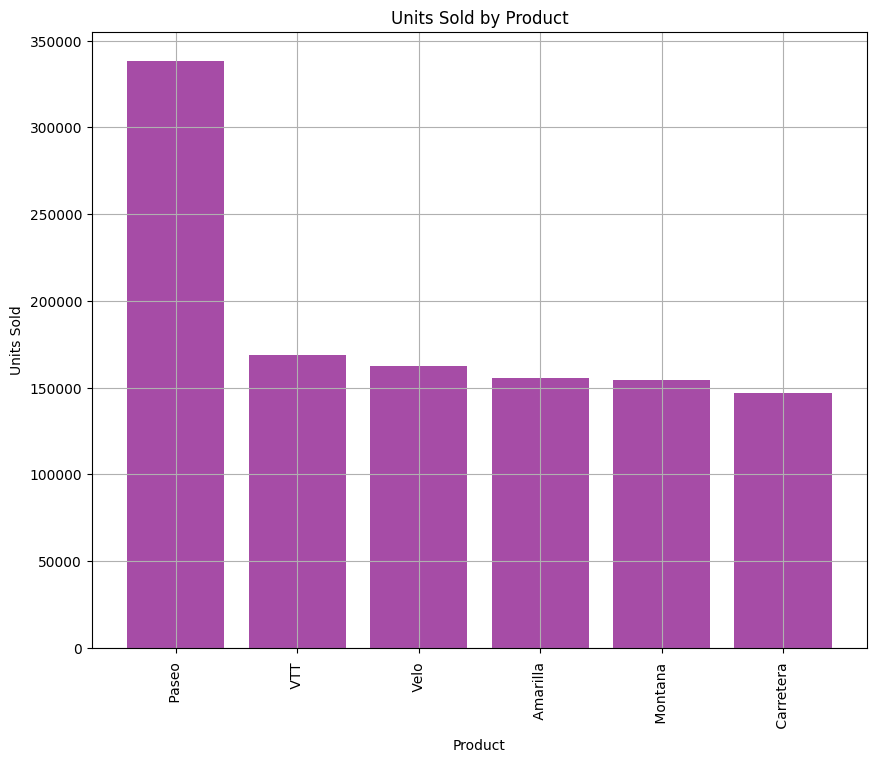

In [64]:
# Calculate total 'Units Sold' for each product
product_units_sold = df.groupby('Product').agg({'Units Sold': 'sum'})

# Sort data by 'Units Sold'
product_units_sold = product_units_sold.sort_values(by='Units Sold', ascending=False)

# Plot 'Units Sold' by Product
plt.figure(figsize=(10, 8))
plt.bar(product_units_sold.index, product_units_sold['Units Sold'], color='purple', alpha=0.7)
plt.title('Units Sold by Product')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Paseo is the top-selling product by a significant margin. There’s a noticeable gap in sales between Paseo and the rest of the products. All other products are relatively close in terms of units sold, but they are still far behind Paseo.

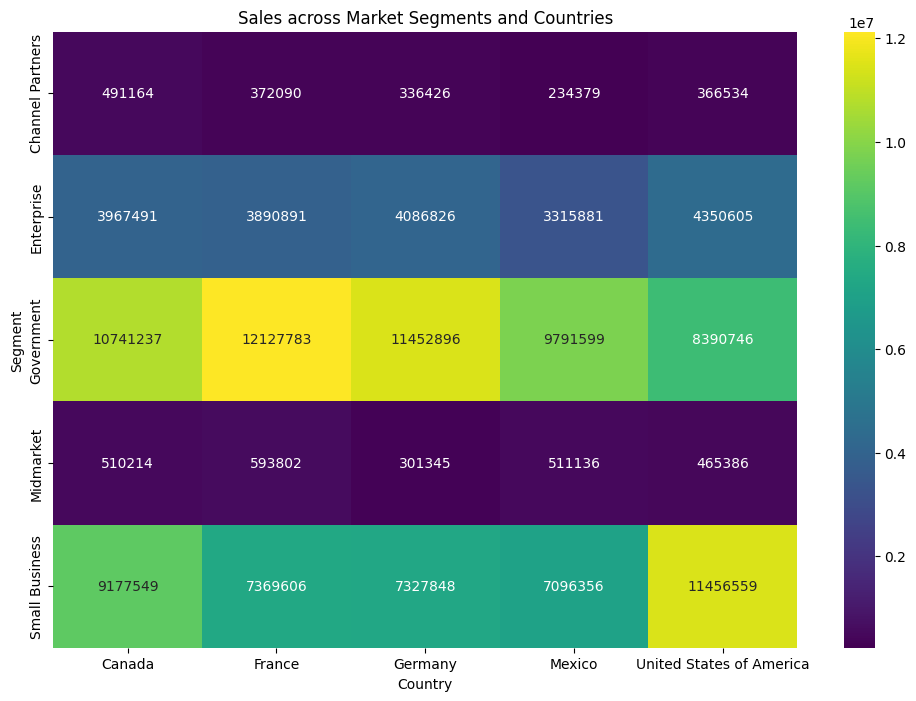

In [65]:
# Create a cross-tabulation of 'Segment' and 'Country' with 'Sales' as values
segment_country_sales = df.pivot_table(values='Sales', index='Segment', columns='Country', aggfunc='sum')

# Plot a heatmap of the cross-tabulation
plt.figure(figsize=(12, 8))
sns.heatmap(segment_country_sales, annot=True, fmt='.0f', cmap='viridis')
plt.title('Sales across Market Segments and Countries')
plt.show()

The Government segment generally has the highest sales in almost all countries, especially in France with sales of 12,127,783. The Midmarket and Channel Partners segments tend to have lower sales across countries than other segments.
The United States has considerable sales across segments, especially in the Small Business and Government segments.

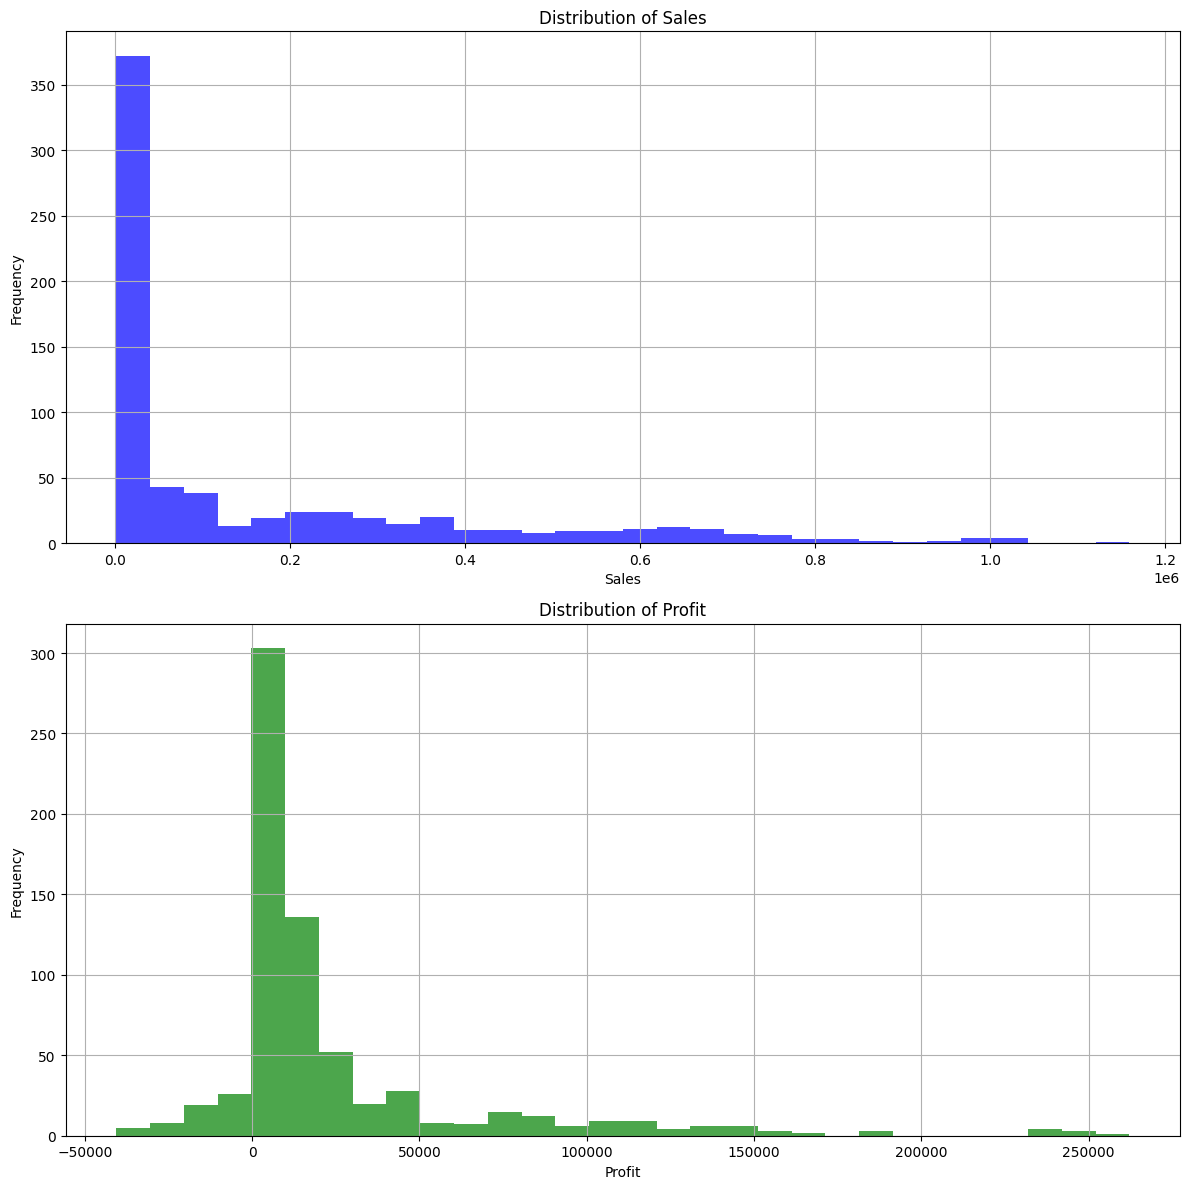

In [66]:
# Create histograms for 'Sales' and 'Profit'
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].hist(df['Sales'], bins=30, color='blue', alpha=0.7)
ax[0].set_title('Distribution of Sales')
ax[0].set_xlabel('Sales')
ax[0].set_ylabel('Frequency')
ax[0].grid()

ax[1].hist(df['Profit'], bins=30, color='green', alpha=0.7)
ax[1].set_title('Distribution of Profit')
ax[1].set_xlabel('Profit')
ax[1].set_ylabel('Frequency')
ax[1].grid()

plt.tight_layout()
plt.show()

1.   Distribution of Sales
*   Most transactions have relatively small sale amounts, with the highest frequency being around sales close to 0.
*   There is a sharp drop in frequency as the number of sales increases. This suggests that transactions with large sales are very rare.
*  The distribution seems to be heavily skewed to the right, meaning that most sales are in the small range, while large sales are less frequent.
2.   Distribution of Profit
*   Most of the profits are around the value of 0 to slightly above it, which indicates that many transactions generate very little or almost no profit.
*   There are a number of transactions with negative profits (losses), but they are relatively few compared to the transactions that generate profits.
*   The distribution of profits is also highly skewed to the right (positive), with most profits being small and only a few transactions with very large profits.

**Key Insights :**
*   The distribution of sales and profits shows that most transactions relate to relatively small values.
*   Only a few transactions generate large amounts of sales and profits.
*   The distribution of sales and profits has a similar pattern, which is skewed to the right, indicating there are a small number of large transactions that dominate, while most transactions are small.



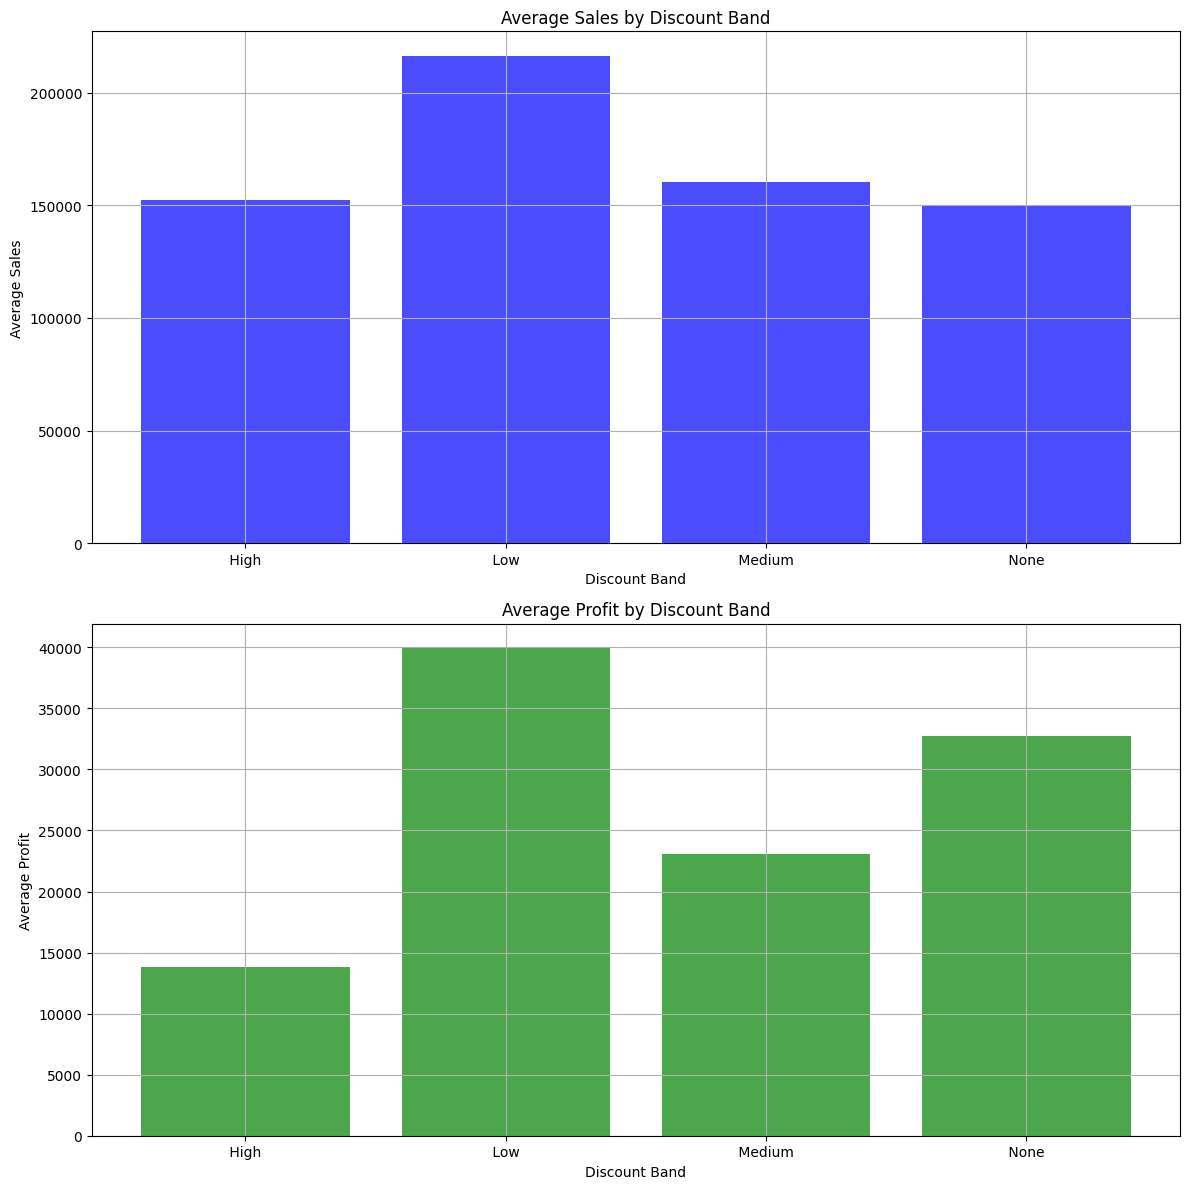

In [67]:
# Calculate average 'Sales' and 'Profit' for each 'Discount Band'
discount_band_averages = df.groupby('Discount Band').agg({'Sales': 'mean', 'Profit': 'mean'})

# Plot average 'Sales' and 'Profit' by 'Discount Band'
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].bar(discount_band_averages.index, discount_band_averages['Sales'], color='blue', alpha=0.7)
ax[0].set_title('Average Sales by Discount Band')
ax[0].set_xlabel('Discount Band')
ax[0].set_ylabel('Average Sales')
ax[0].grid()

ax[1].bar(discount_band_averages.index, discount_band_averages['Profit'], color='green', alpha=0.7)
ax[1].set_title('Average Profit by Discount Band')
ax[1].set_xlabel('Discount Band')
ax[1].set_ylabel('Average Profit')
ax[1].grid()

plt.tight_layout()
plt.show()

*   The highest sales are achieved with Low discounts, followed by Medium, None, and High discounts. This shows that low discounts seem to attract more customers and increase sales.
*   The highest profits also occur with Low discounts, indicating that these discounts are the most efficient in generating high profits.
*   Interestingly, giving a high discount (High) actually results in the lowest average profit. This is probably because even though sales went up, the profit margin was severely eroded by the high discount.
*   Sales with no discount (None) had a fairly good profit, higher than both Medium and High discounts, suggesting that in some cases, not discounting can be more profitable.

Overall, low discounting (Low) seems to be the best strategy for increasing sales and profits, while high discounting tends to reduce profit margins significantly.





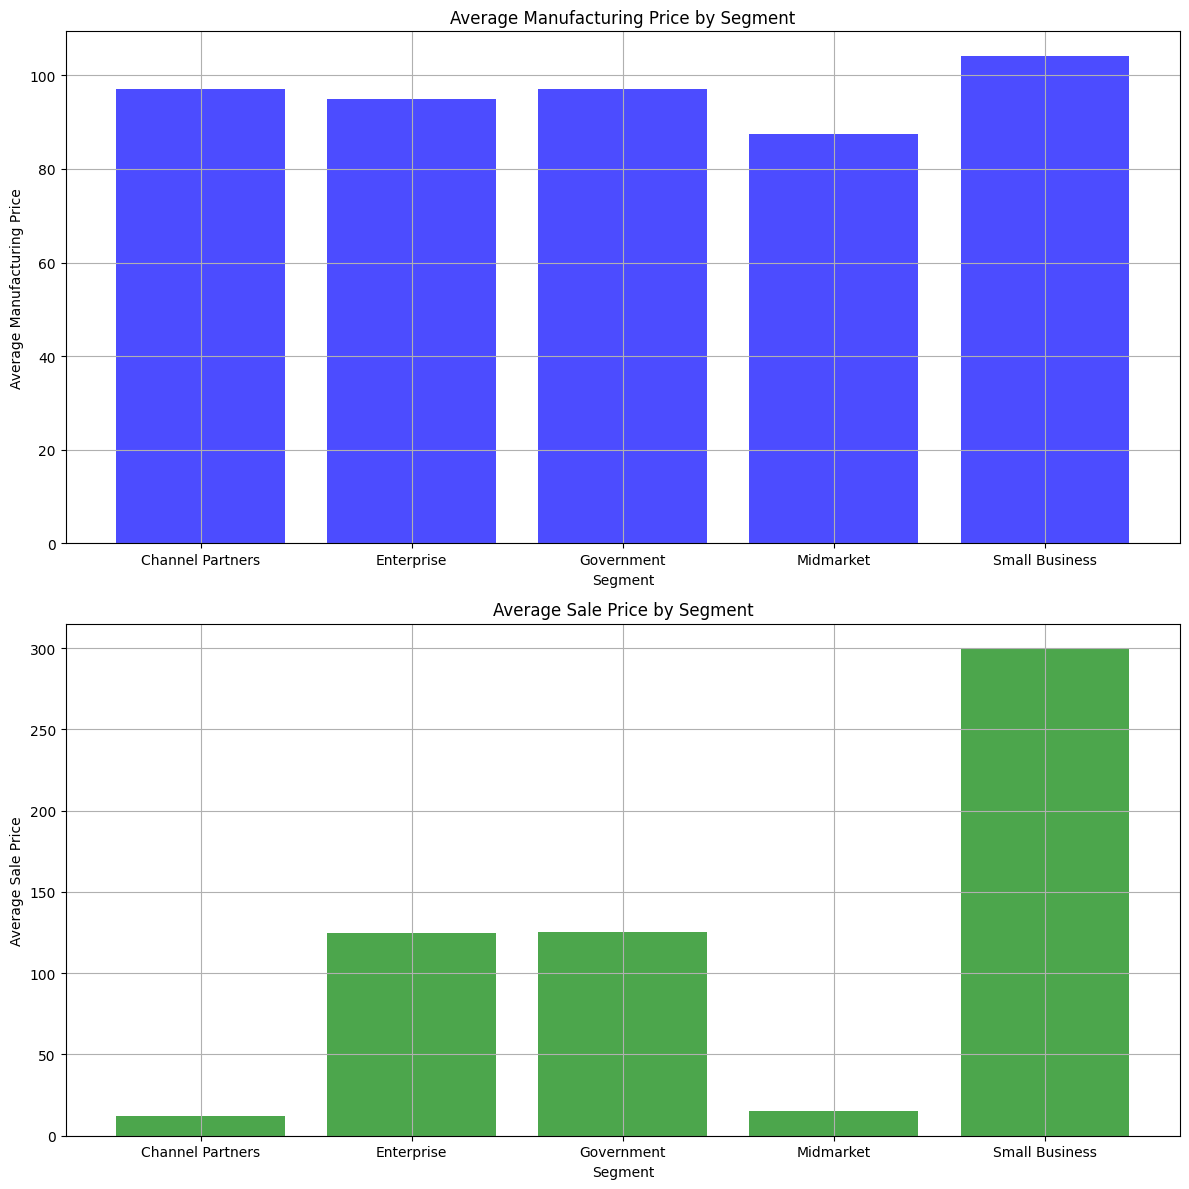

In [68]:
# Calculate average 'Manufacturing Price' and 'Sale Price' for each 'Segment'
segment_prices = df.groupby('Segment').agg({'Manufacturing Price': 'mean', 'Sale Price': 'mean'})

# Plot average 'Manufacturing Price' and 'Sale Price' by 'Segment'
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

ax[0].bar(segment_prices.index, segment_prices['Manufacturing Price'], color='blue', alpha=0.7)
ax[0].set_title('Average Manufacturing Price by Segment')
ax[0].set_xlabel('Segment')
ax[0].set_ylabel('Average Manufacturing Price')
ax[0].grid()

ax[1].bar(segment_prices.index, segment_prices['Sale Price'], color='green', alpha=0.7)
ax[1].set_title('Average Sale Price by Segment')
ax[1].set_xlabel('Segment')
ax[1].set_ylabel('Average Sale Price')
ax[1].grid()

plt.tight_layout()
plt.show()

The cost of manufacture for all segments is relatively consistent and hovers around the same figure. However, sales prices show a large variation, with Small Business having a much higher sales margin than the other segments.

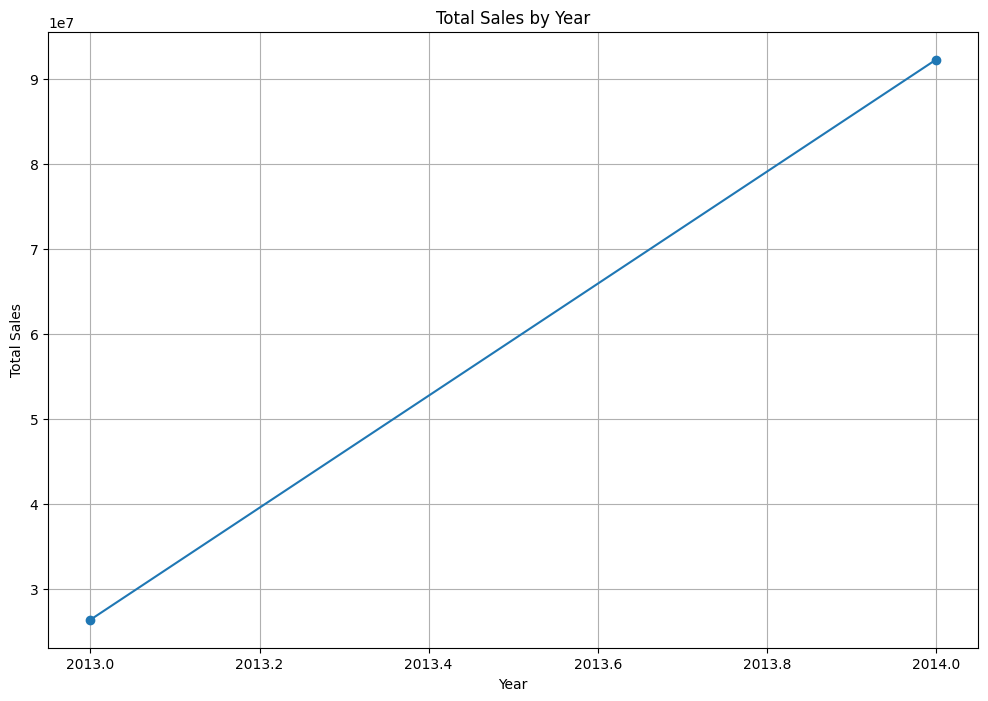

In [69]:
# Calculate total 'Sales' for each year
yearly_sales = df.groupby(df['Date'].dt.year).agg({'Sales': 'sum'})

# Plot total 'Sales' by year
plt.figure(figsize=(12, 8))
plt.plot(yearly_sales.index, yearly_sales['Sales'], marker='o')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

This graph indicates significant sales growth from 2013 to 2014, with an almost linear increase. This may reflect consistent business growth or increased market demand during this period.

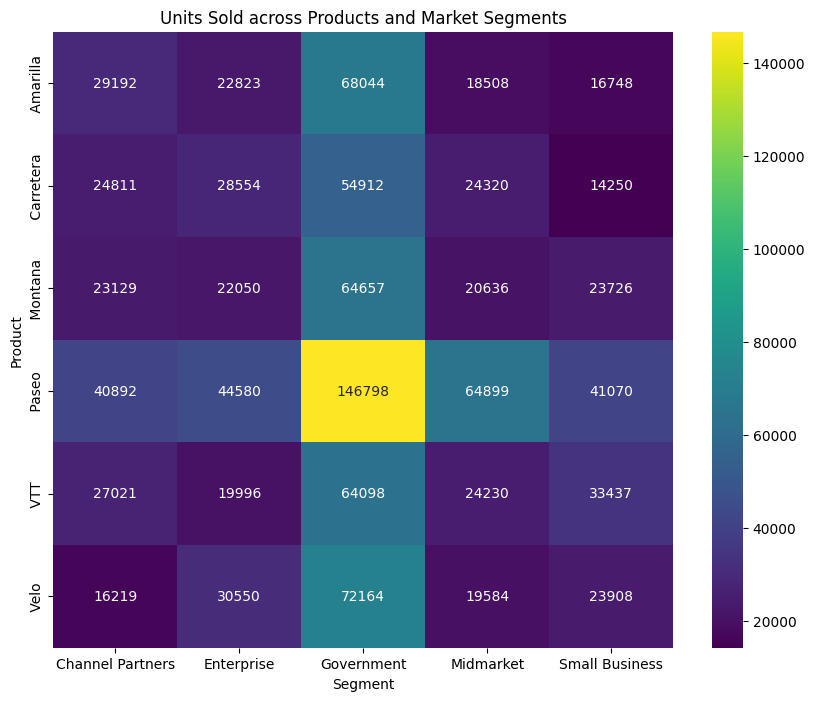

In [70]:
# Create a pivot table of 'Units Sold' with 'Product' and 'Segment' as dimensions
product_segment_units = df.pivot_table(values='Units Sold', index='Product', columns='Segment', aggfunc='sum')

# Plot a heatmap of the pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(product_segment_units, annot=True, fmt='.0f', cmap='viridis')
plt.title('Units Sold across Products and Market Segments')
plt.show()

*   Paseo products and the Government segment dominate overall sales.
*   The Small Business segment and Amarilla products tend to have lower sales figures compared to other segments and products.
*   This heatmap provides a clear picture of the differences in sales distribution based on product combinations and market segments.

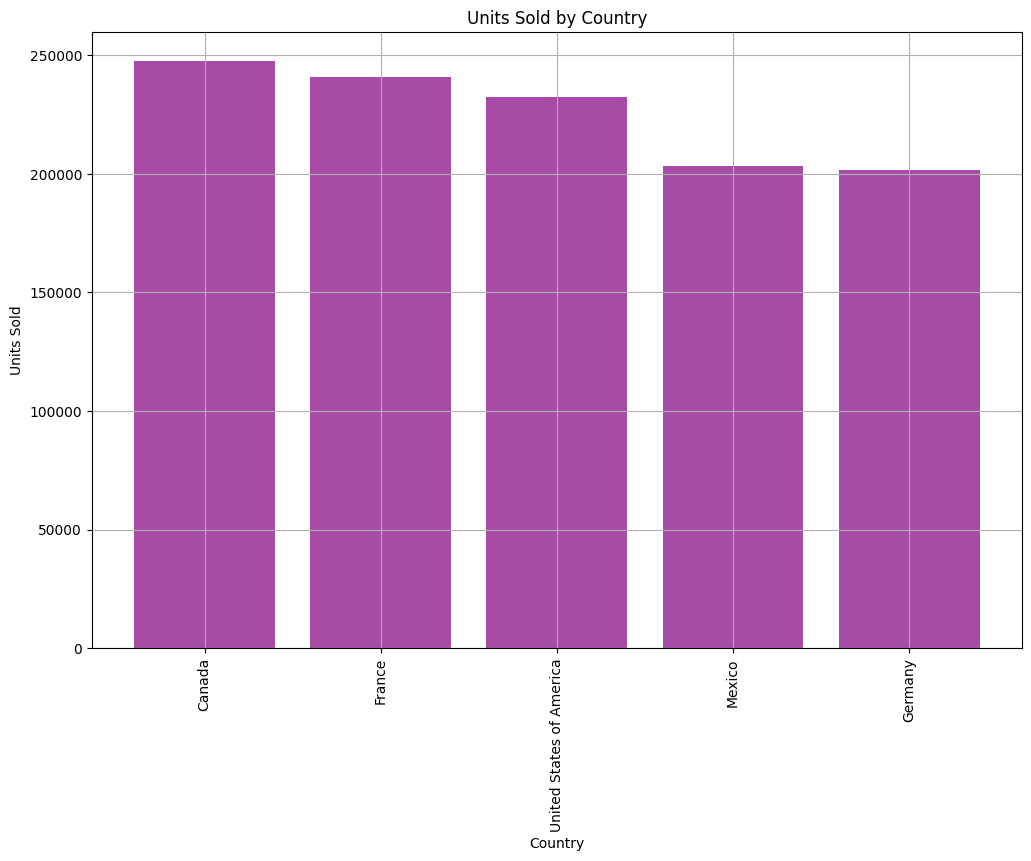

In [71]:
# Calculate total 'Units Sold' for each country
country_units_sold = df.groupby('Country').agg({'Units Sold': 'sum'})

# Sort data by 'Units Sold'
country_units_sold = country_units_sold.sort_values(by='Units Sold', ascending=False)

# Plot 'Units Sold' by Country
plt.figure(figsize=(12, 8))
plt.bar(country_units_sold.index, country_units_sold['Units Sold'], color='purple', alpha=0.7)
plt.title('Units Sold by Country')
plt.xlabel('Country')
plt.ylabel('Units Sold')
plt.xticks(rotation=90)
plt.grid()
plt.show()

*   Canada and France have the highest number of units sold, each close to 250,000.
*   The United States of America has slightly fewer units sold than Canada and France but is still significant.
*   Mexico and Germany show a similar and slightly lower amount of units sold compared to the other countries, with both countries at around 200,000 units.

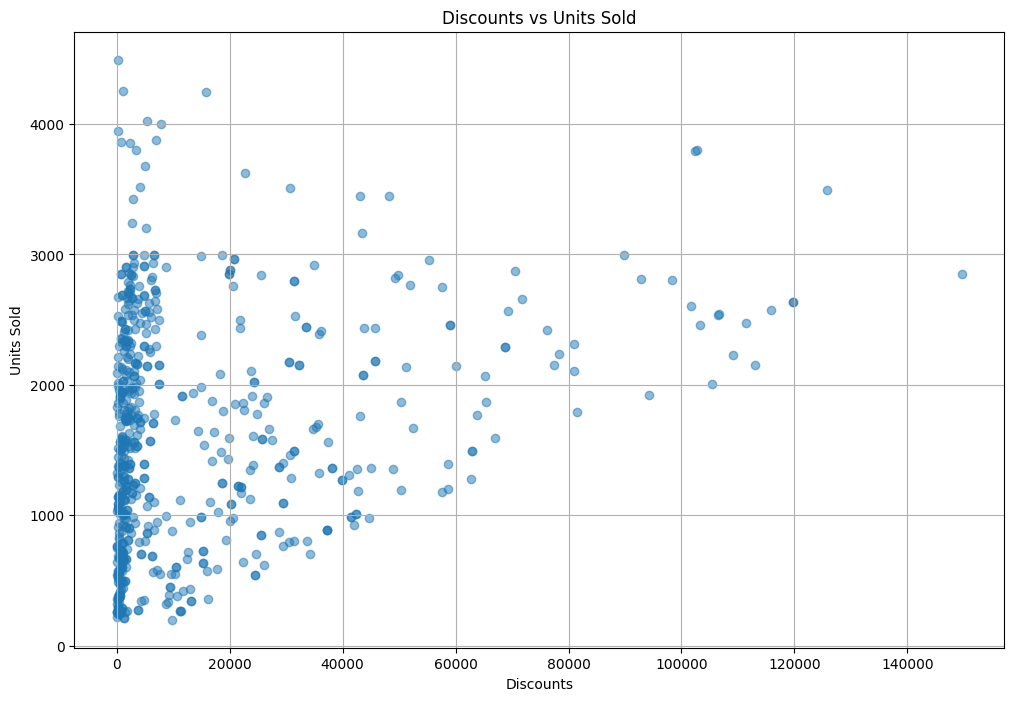

In [72]:
# Create a scatter plot of 'Discounts' vs 'Units Sold'
plt.figure(figsize=(12, 8))
plt.scatter(df['Discounts'], df['Units Sold'], alpha=0.5)
plt.title('Discounts vs Units Sold')
plt.xlabel('Discounts')
plt.ylabel('Units Sold')
plt.grid()
plt.show()

*   Concentration at lower discounts: Most of the data points are concentrated near the left side of the graph, indicating that many units are sold with relatively small discounts (close to 0), yet the number of units sold can still vary significantly (up to 4000).
*   Spread of points: As the discount value increases, the number of units sold decreases, with fewer data points as the discount values rise beyond 20,000. This could suggest that larger discounts are rarer or less frequently associated with higher sales volume.
*   Scattered pattern: There is no clear linear relationship between discounts and units sold. While some high discount levels are associated with higher units sold, many higher discounts (such as beyond 80,000) are associated with relatively low sales.

The plot suggests that increasing discounts do not necessarily lead to higher units sold. The majority of sales occur at lower discount levels, with some variability in the number of units sold across different discount ranges.

<ipython-input-73-5d8350736e3f>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_profit_margin = df.groupby('Product').apply(lambda x: (x['Profit'].sum() / x['Sales'].sum()) * 100).sort_values(ascending=False)


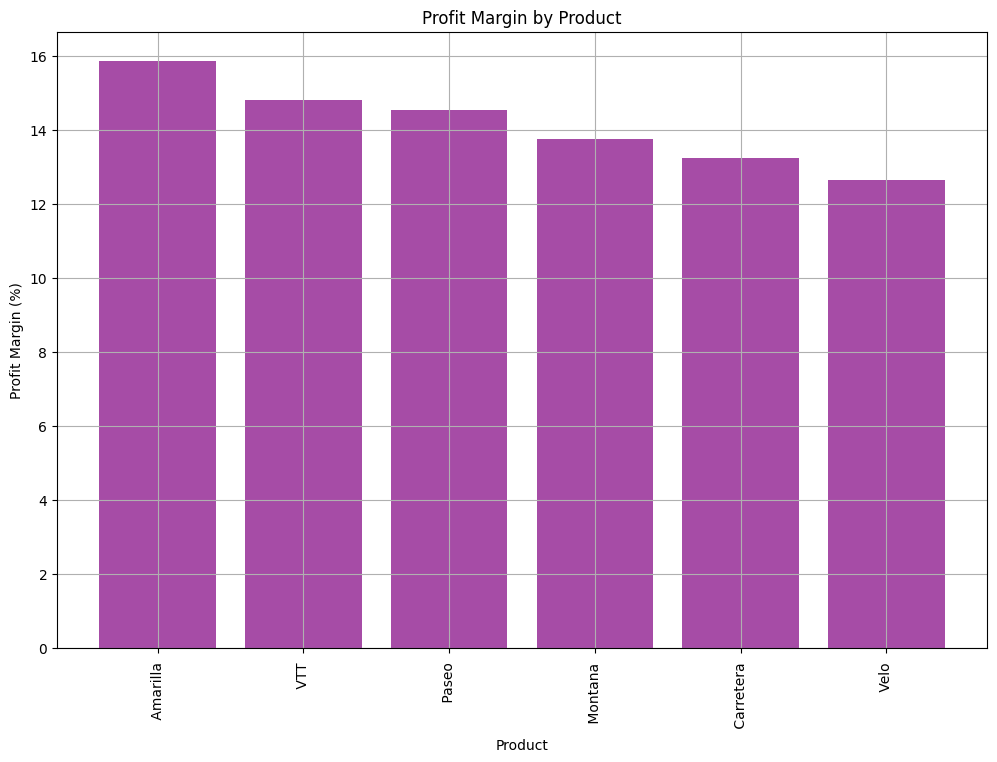

In [73]:
# Calculate profit margin for each product
product_profit_margin = df.groupby('Product').apply(lambda x: (x['Profit'].sum() / x['Sales'].sum()) * 100).sort_values(ascending=False)

# Plot profit margin by product
plt.figure(figsize=(12, 8))
plt.bar(product_profit_margin.index, product_profit_margin, color='purple', alpha=0.7)
plt.title('Profit Margin by Product')
plt.xlabel('Product')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Amarilla and VTT are the most profitable products, while Velo has the lowest profit margin among the six products listed. The overall range of profit margins is between 12% and 16%, indicating a moderate variation across products.

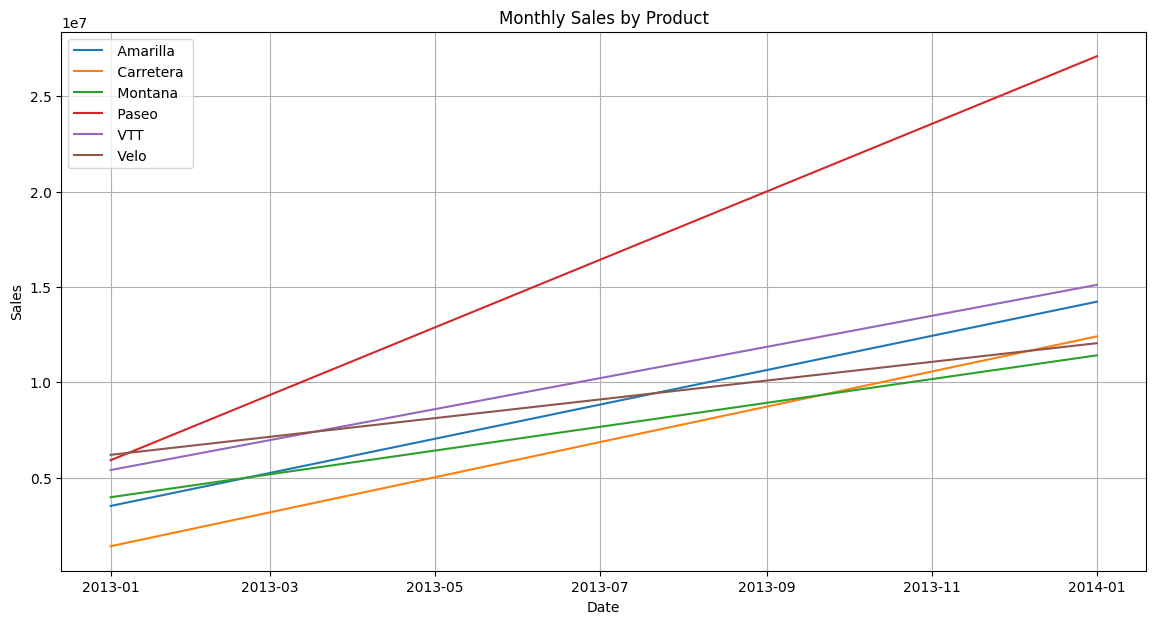

In [74]:
# Create a new dataframe with total monthly sales for each product
monthly_product_sales = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Product']).agg({'Sales': 'sum'})
monthly_product_sales.index.names = ['Year', 'Month', 'Product']
monthly_product_sales.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_product_sales['Year-Month'] = pd.to_datetime(monthly_product_sales[['Year', 'Month']].assign(day=1))

# Plot monthly sales for each product
plt.figure(figsize=(14, 7))
for product in monthly_product_sales['Product'].unique():
    product_data = monthly_product_sales[monthly_product_sales['Product'] == product]
    plt.plot(product_data['Year-Month'], product_data['Sales'], label=product)
plt.title('Monthly Sales by Product')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

*   The Paseo product (red line) shows the highest growth, with a steep upward trend. By the end of the period, its sales have exceeded 2.5 million.
*   VTT (purple line) has the second-highest growth, though less steep than Paseo.
*   Amarilla (blue), Montana (green), Velo (brown), and Carretera (orange) are all showing positive but more moderate growth, with Carretera starting from a lower sales base.
*   Paseo stands out as a product with consistently increasing sales and the highest overall sales.
*   Carretera has the lowest sales throughout the period, though it is also growing steadily.

This graph indicates that sales for all products are on the rise, with Paseo and VTT showing the most notable increases over the year.

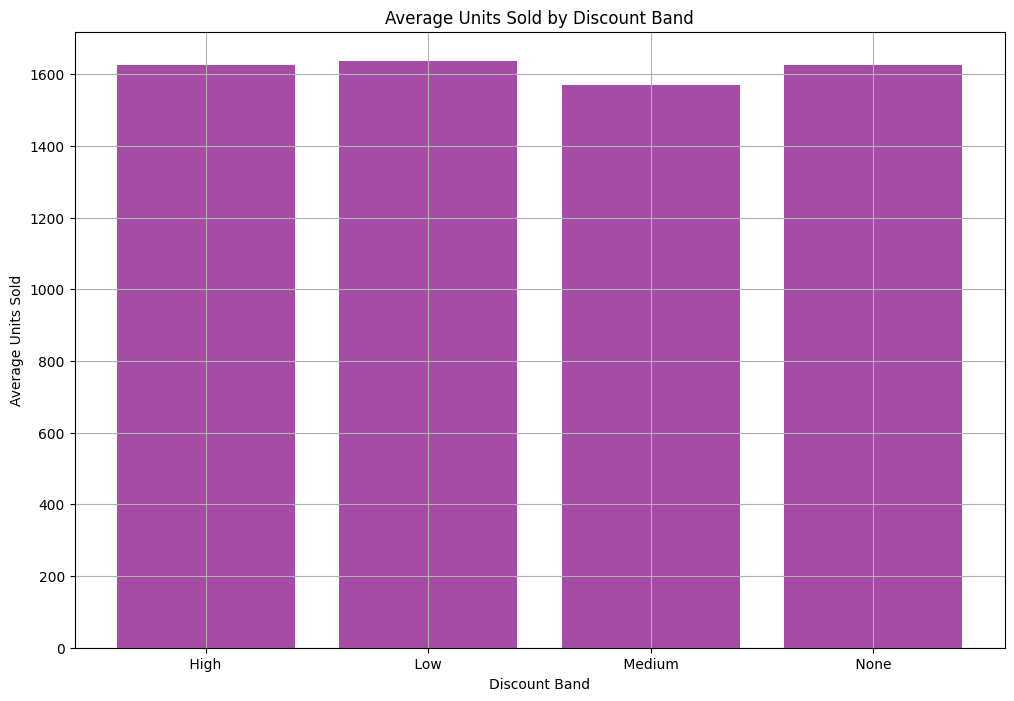

In [75]:
# Calculate average 'Units Sold' for each 'Discount Band'
discount_band_units = df.groupby('Discount Band').agg({'Units Sold': 'mean'})

# Plot average 'Units Sold' by 'Discount Band'
plt.figure(figsize=(12, 8))
plt.bar(discount_band_units.index, discount_band_units['Units Sold'], color='purple', alpha=0.7)
plt.title('Average Units Sold by Discount Band')
plt.xlabel('Discount Band')
plt.ylabel('Average Units Sold')
plt.grid()
plt.show()

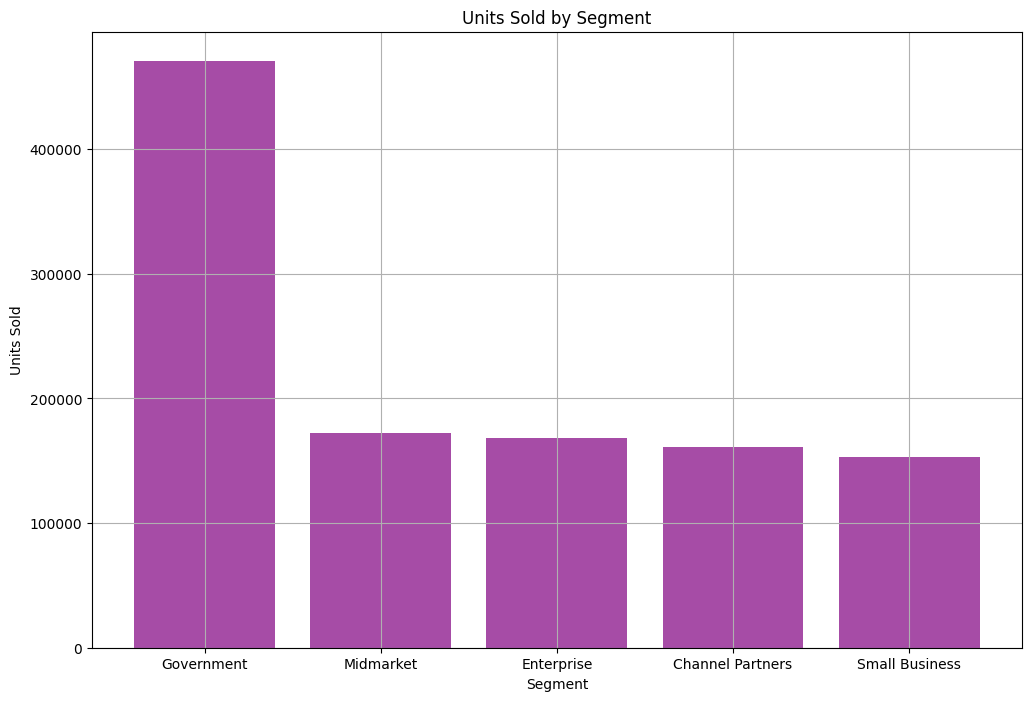

In [76]:
# Calculate total 'Units Sold' for each 'Segment'
segment_units_sold = df.groupby('Segment').agg({'Units Sold': 'sum'})

# Sort data by 'Units Sold'
segment_units_sold = segment_units_sold.sort_values(by='Units Sold', ascending=False)

# Plot 'Units Sold' by Segment
plt.figure(figsize=(12, 8))
plt.bar(segment_units_sold.index, segment_units_sold['Units Sold'], color='purple', alpha=0.7)
plt.title('Units Sold by Segment')
plt.xlabel('Segment')
plt.ylabel('Units Sold')
plt.grid()
plt.show()

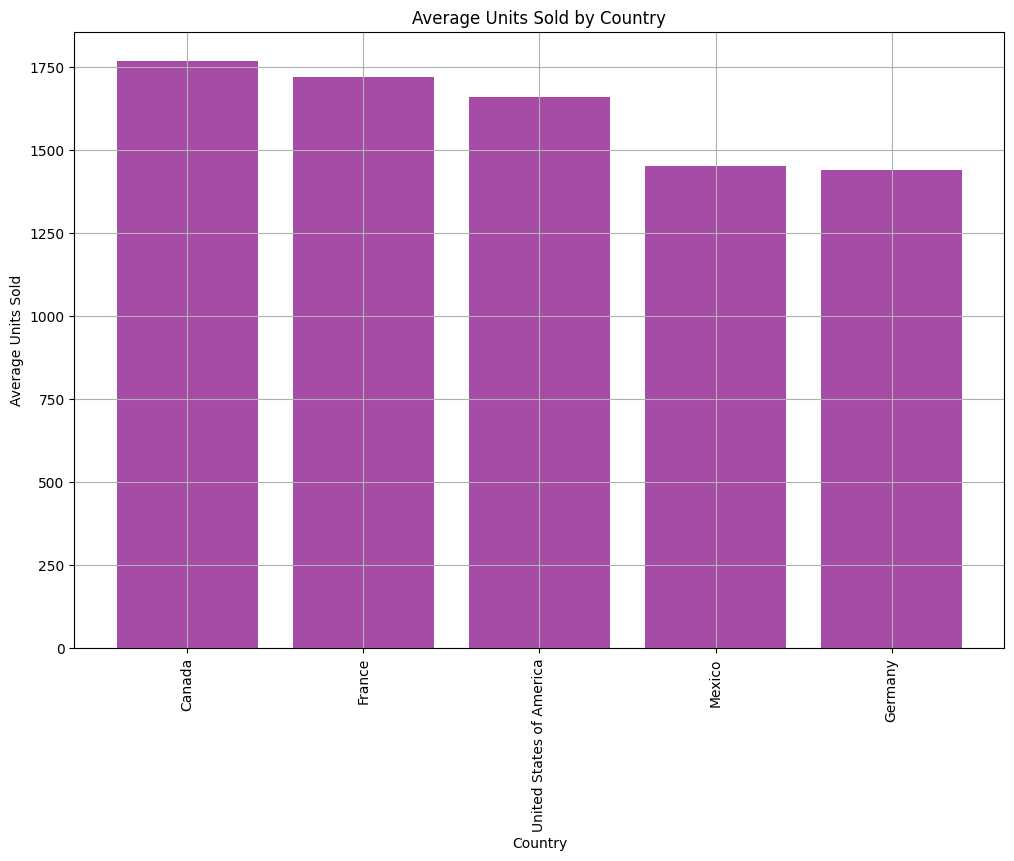

In [77]:
# Calculate average 'Units Sold' for each country
country_units_sold = df.groupby('Country').agg({'Units Sold': 'mean'})

# Sort data by 'Units Sold'
country_units_sold = country_units_sold.sort_values(by='Units Sold', ascending=False)

# Plot 'Units Sold' by Country
plt.figure(figsize=(12, 8))
plt.bar(country_units_sold.index, country_units_sold['Units Sold'], color='purple', alpha=0.7)
plt.title('Average Units Sold by Country')
plt.xlabel('Country')
plt.ylabel('Average Units Sold')
plt.xticks(rotation=90)
plt.grid()
plt.show()

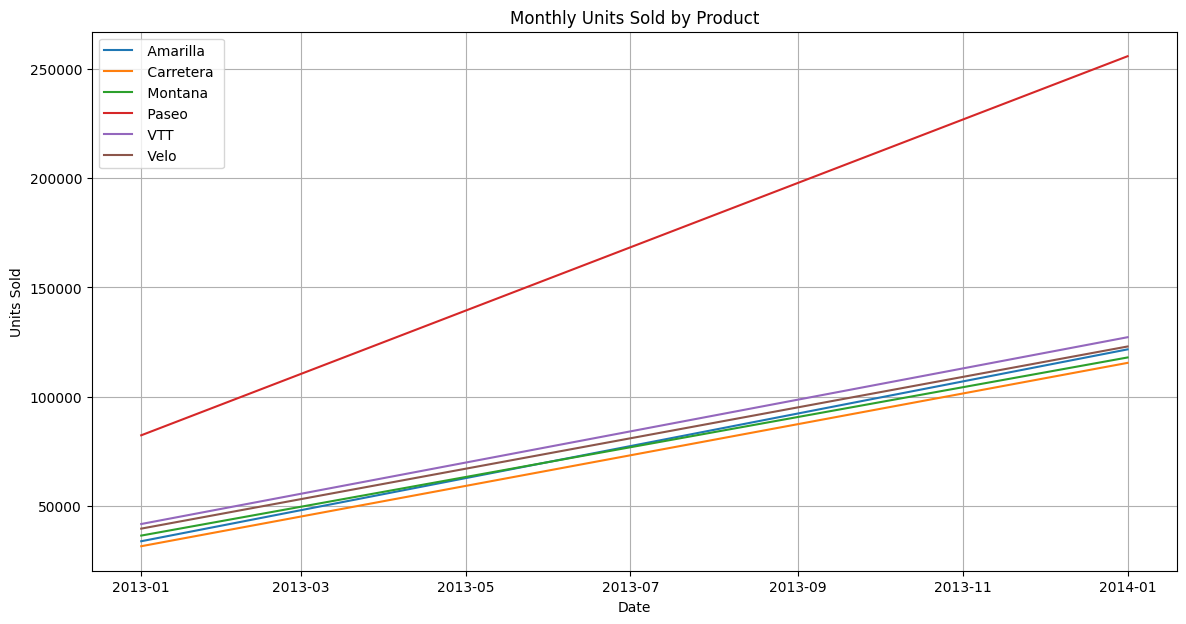

In [78]:
# Create a new dataframe with total monthly units sold for each product
monthly_product_units = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Product']).agg({'Units Sold': 'sum'})
monthly_product_units.index.names = ['Year', 'Month', 'Product']
monthly_product_units.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_product_units['Year-Month'] = pd.to_datetime(monthly_product_units[['Year', 'Month']].assign(day=1))

# Plot monthly units sold for each product
plt.figure(figsize=(14, 7))
for product in monthly_product_units['Product'].unique():
    product_data = monthly_product_units[monthly_product_units['Product'] == product]
    plt.plot(product_data['Year-Month'], product_data['Units Sold'], label=product)
plt.title('Monthly Units Sold by Product')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.grid()
plt.show()

This graph shows that Paseo is the clear frontrunner in terms of units sold, which aligns with its leadership in both sales and profits. The other products show growth, but they lag considerably behind Paseo. The data suggests that Paseo is in higher demand, driving both high unit sales and profitability.

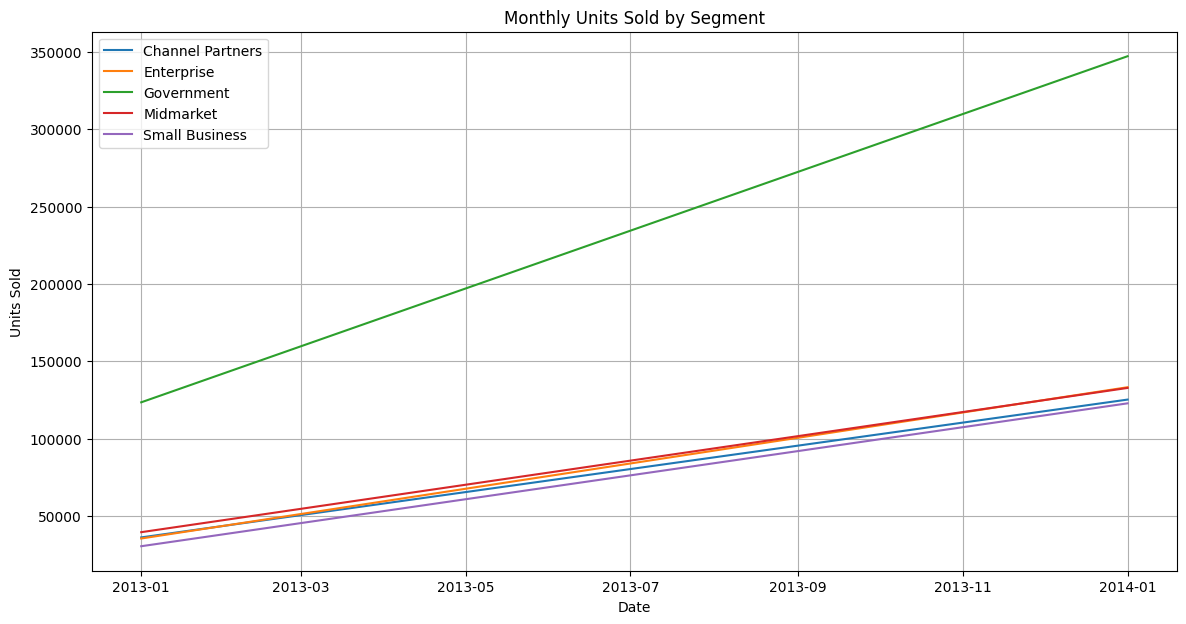

In [79]:
# Create a new dataframe with total monthly units sold for each segment
monthly_segment_units = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Segment']).agg({'Units Sold': 'sum'})
monthly_segment_units.index.names = ['Year', 'Month', 'Segment']
monthly_segment_units.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_segment_units['Year-Month'] = pd.to_datetime(monthly_segment_units[['Year', 'Month']].assign(day=1))

# Plot monthly units sold for each segment
plt.figure(figsize=(14, 7))
for segment in monthly_segment_units['Segment'].unique():
    segment_data = monthly_segment_units[monthly_segment_units['Segment'] == segment]
    plt.plot(segment_data['Year-Month'], segment_data['Units Sold'], label=segment)
plt.title('Monthly Units Sold by Segment')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.grid()
plt.show()

*   Enterprise experienced the most significant increase in sales, much higher than other segments, surpassing 300,000 units by the end of 2013.
*   The Government, Midmarket, Small Business, and Channel Partners segments grew at a lower rate than Enterprise, with sales ranging from 50,000 to approximately 100,000 units by year-end.
*   The segment with the least growth was Channel Partners, followed by Small Business.

So, overall, Enterprise dominated in terms of unit sales increase during 2013.

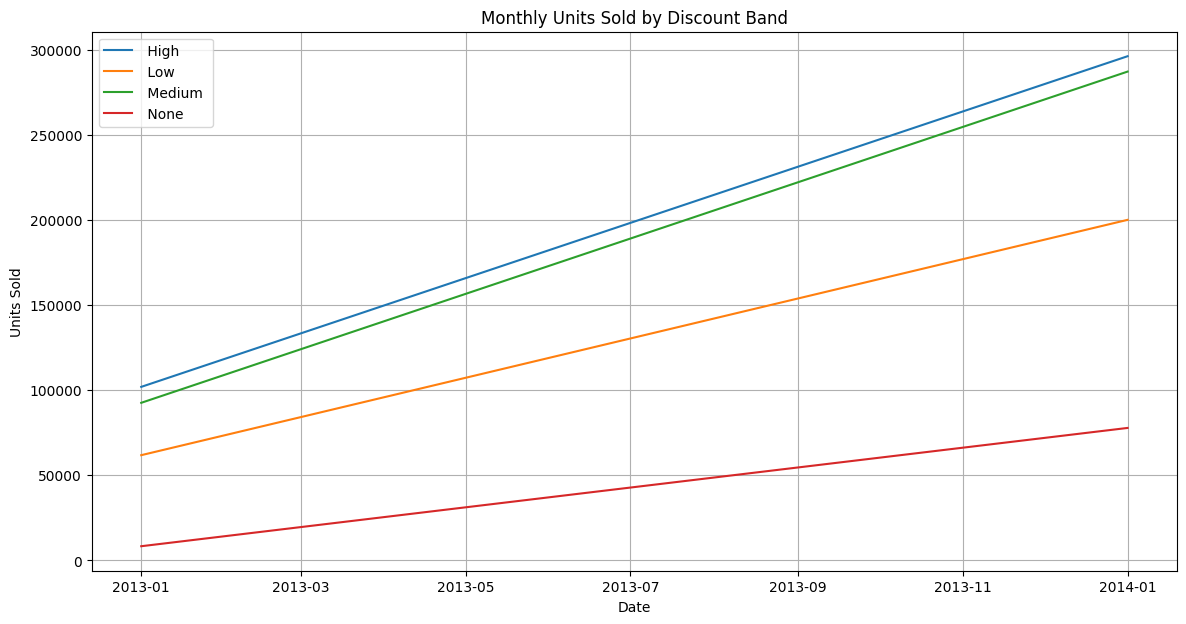

In [80]:
# Create a new dataframe with total monthly units sold for each discount band
monthly_discount_units = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Discount Band']).agg({'Units Sold': 'sum'})
monthly_discount_units.index.names = ['Year', 'Month', 'Discount Band']
monthly_discount_units.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_discount_units['Year-Month'] = pd.to_datetime(monthly_discount_units[['Year', 'Month']].assign(day=1))

# Plot monthly units sold for each discount band
plt.figure(figsize=(14, 7))
for discount_band in monthly_discount_units['Discount Band'].unique():
    discount_band_data = monthly_discount_units[monthly_discount_units['Discount Band'] == discount_band]
    plt.plot(discount_band_data['Year-Month'], discount_band_data['Units Sold'], label=discount_band)
plt.title('Monthly Units Sold by Discount Band')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.grid()
plt.show()

*   High discount had the highest number of sales compared to the other categories, reaching nearly 300,000 units by the end of 2013.
*   Medium discount also generated high sales, but slightly below the High category, with steady growth throughout the year.
*   Low discount generated lower sales than High and Medium, but still saw a gradual increase until the end of the year.
*   None showed the lowest sales among the other categories, but the number of units sold continued to increase steadily throughout the period.

In conclusion, higher discounts seem to drive more sales, with high and medium discounts generating the largest sales volume, while the no discount category had the slowest growth.

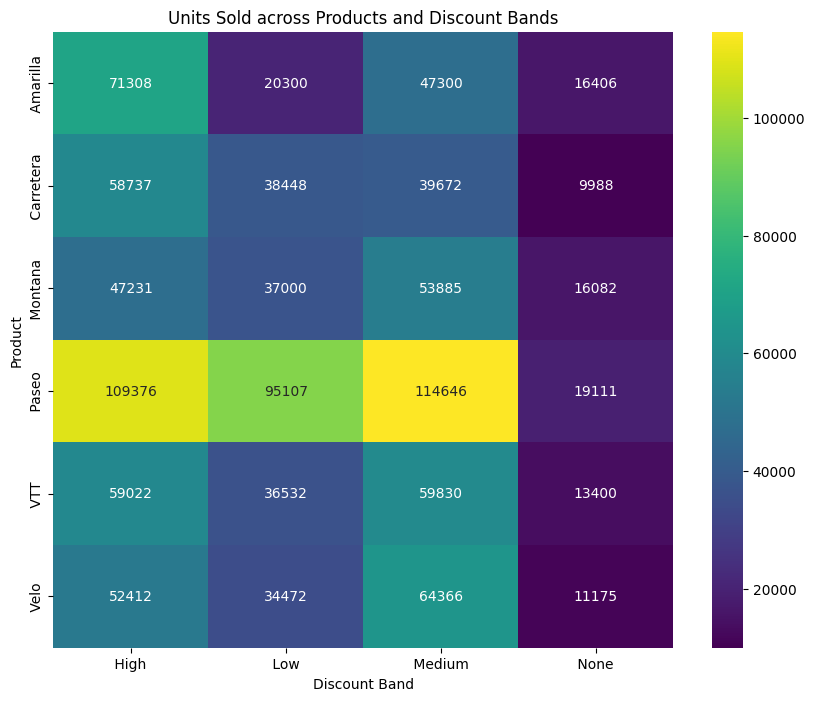

In [81]:
# Create a pivot table of 'Units Sold' with 'Product' and 'Discount Band' as dimensions
product_discount_units = df.pivot_table(values='Units Sold', index='Product', columns='Discount Band', aggfunc='sum')

# Plot a heatmap of the pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(product_discount_units, annot=True, fmt='.0f', cmap='viridis')
plt.title('Units Sold across Products and Discount Bands')
plt.show()

This figure displays a table showing unit sales across different products and discounts. The table shows that the product ‘Paseo’ has the most unit sales across all discount bands. Among the discount bands, the ‘Medium’ discount band shows higher unit sales compared to the others. The product ‘Amarilla’ has the most unit sales in the ‘High’ discount band, while the product ‘Velo’ has the most unit sales in the ‘Medium’ and ‘None’ discount bands. The ‘Carretera’ product shows the most unit sales in the ‘Low’ discount band.

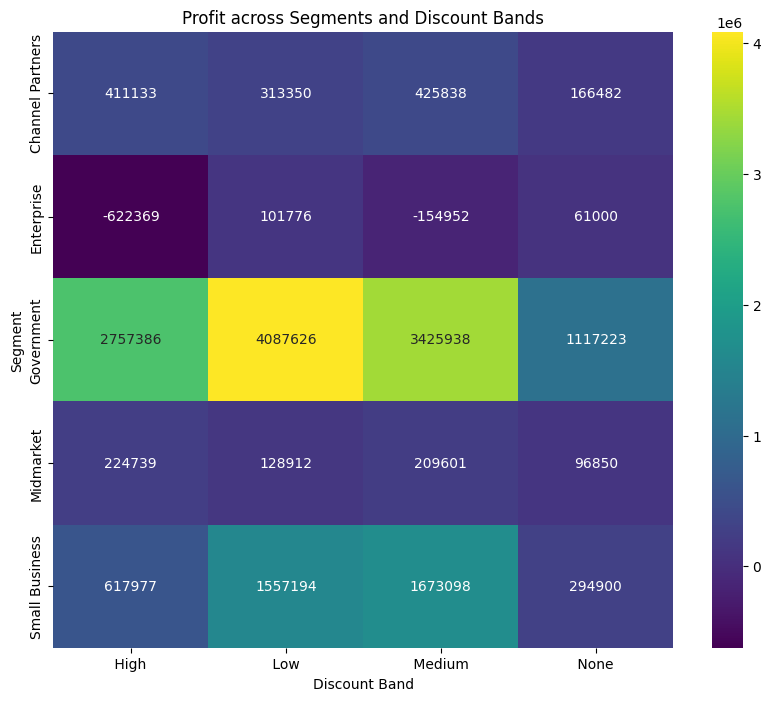

In [82]:
# Create a pivot table of 'Profit' with 'Segment' and 'Discount Band' as dimensions
segment_discount_profit = df.pivot_table(values='Profit', index='Segment', columns='Discount Band', aggfunc='sum')

# Plot a heatmap of the pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(segment_discount_profit, annot=True, fmt='.0f', cmap='viridis')
plt.title('Profit across Segments and Discount Bands')
plt.show()

*   The graph shows that the Government segment generates the most profit across all chunks, except None.
*   The Channel Partners segment also generated significant profit across all chunks.
*   The Small Business and Midmarket segments generated the least profit across all chunks.
*   The Enterprise segment generated the most losses across all chunks.
Overall, it appears that giving away chunks can have a positive impact on profits, but this can vary depending on the segment.

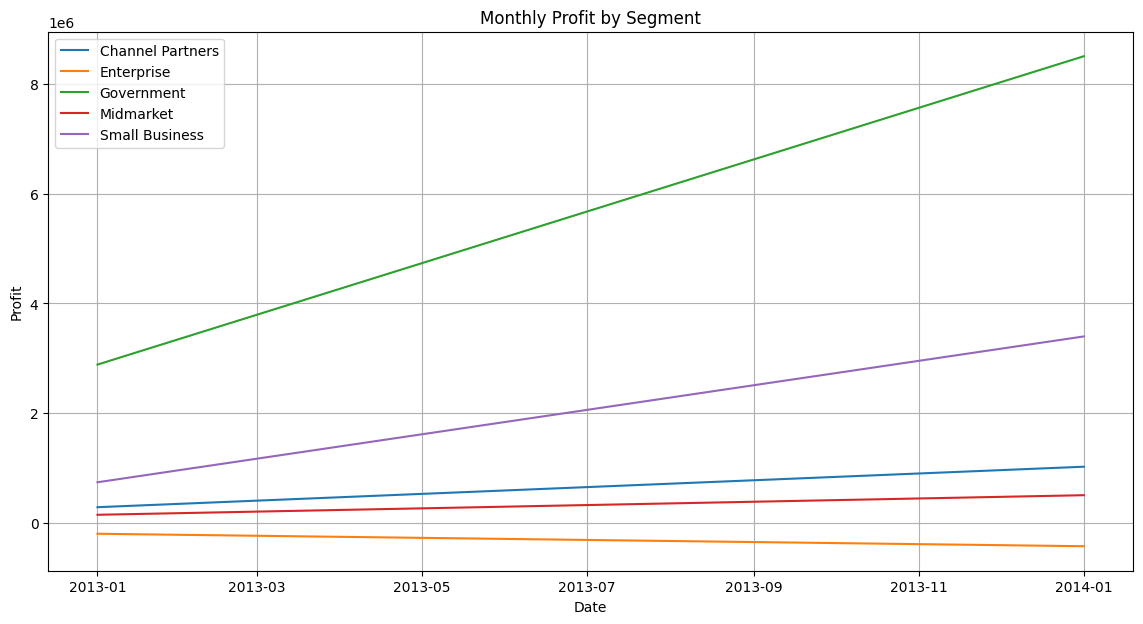

In [83]:
# Create a new dataframe with total monthly profit for each segment
monthly_segment_profit = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Segment']).agg({'Profit': 'sum'})
monthly_segment_profit.index.names = ['Year', 'Month', 'Segment']
monthly_segment_profit.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_segment_profit['Year-Month'] = pd.to_datetime(monthly_segment_profit[['Year', 'Month']].assign(day=1))

# Plot monthly profit for each segment
plt.figure(figsize=(14, 7))
for segment in monthly_segment_profit['Segment'].unique():
    segment_data = monthly_segment_profit[monthly_segment_profit['Segment'] == segment]
    plt.plot(segment_data['Year-Month'], segment_data['Profit'], label=segment)
plt.title('Monthly Profit by Segment')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()

*   The chart shows that the Government segment was the most profitable segment over time, with profits increasing from approximately 2.7 million at the beginning of the year to approximately 9 million at the end of the year.
*   The Small Business segment also showed healthy profit growth, from around 500,000 at the beginning of the year to around 3.5 million at the end of the year.
*   The Channel Partner and Mid-Market segments showed relatively stable profits, with Channel Partner profits increasing slightly and Mid-Market profits decreasing slightly during the year.
*   The Enterprise segment was the only segment to show a decline in profits during the year, from around 100,000 at the start of the year to around 0 at the end of the year.

Overall, the graph shows that the business was generally profitable, with the Government and Small Business segments being the main drivers of profits. Nonetheless, it is important to note that the Corporate segment saw a decline in profits and that should be a concern for management.

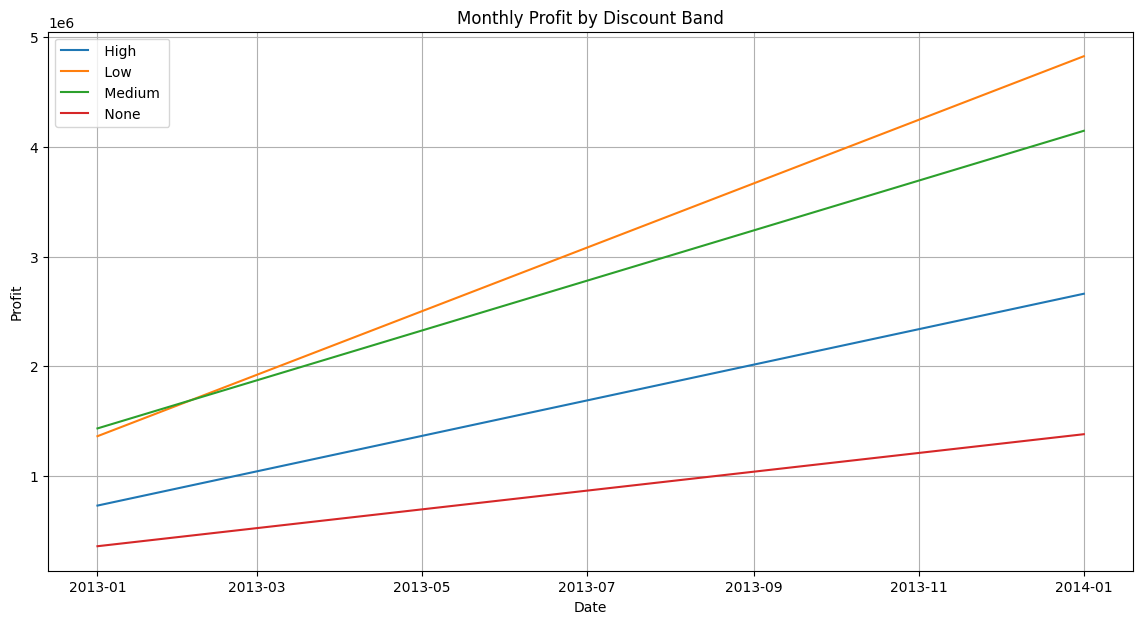

In [84]:
# Create a new dataframe with total monthly profit for each discount band
monthly_discount_profit = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Discount Band']).agg({'Profit': 'sum'})
monthly_discount_profit.index.names = ['Year', 'Month', 'Discount Band']
monthly_discount_profit.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_discount_profit['Year-Month'] = pd.to_datetime(monthly_discount_profit[['Year', 'Month']].assign(day=1))

# Plot monthly profit for each discount band
plt.figure(figsize=(14, 7))
for discount_band in monthly_discount_profit['Discount Band'].unique():
    discount_band_data = monthly_discount_profit[monthly_discount_profit['Discount Band'] == discount_band]
    plt.plot(discount_band_data['Year-Month'], discount_band_data['Profit'], label=discount_band)
plt.title('Monthly Profit by Discount Band')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()

The graph shows the monthly profit by discount group from January to December 2013. The graph displays four lines, which represent profits for high discount, low discount, medium discount, and no discount. The line representing high discount is the top line, and the line representing no discount is the bottom line. The graph shows that the monthly profit increases over time for each discount group. The profit for high discount is the highest, and the profit for no discount is the lowest.

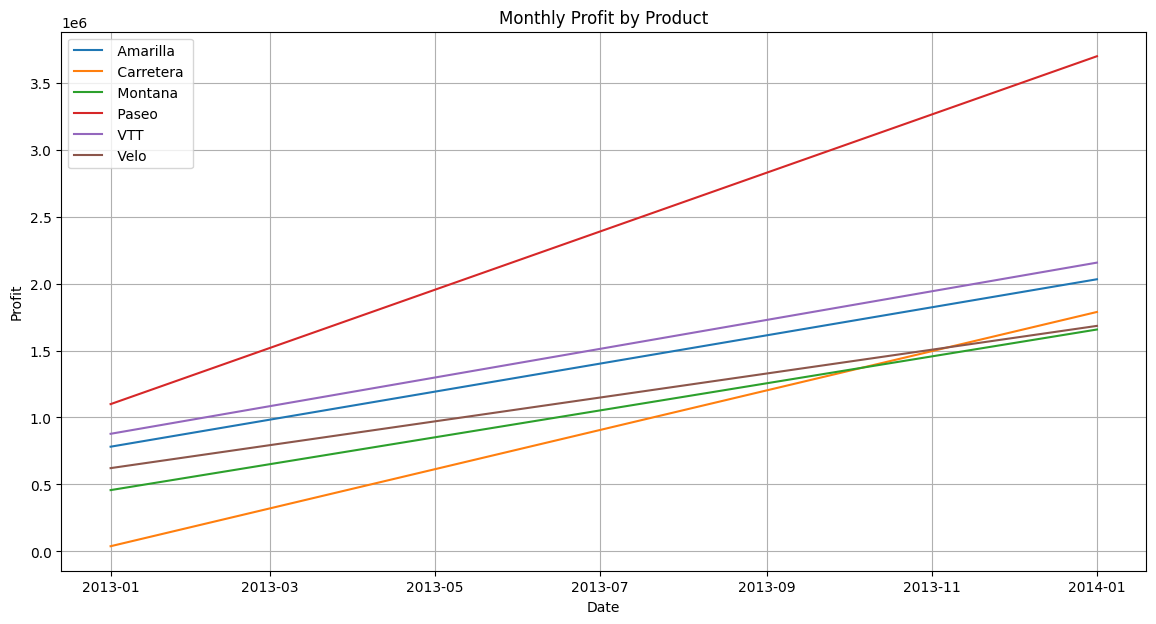

In [85]:
# Create a new dataframe with total monthly profit for each product
monthly_product_profit = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Product']).agg({'Profit': 'sum'})
monthly_product_profit.index.names = ['Year', 'Month', 'Product']
monthly_product_profit.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_product_profit['Year-Month'] = pd.to_datetime(monthly_product_profit[['Year', 'Month']].assign(day=1))

# Plot monthly profit for each product
plt.figure(figsize=(14, 7))
for product in monthly_product_profit['Product'].unique():
    product_data = monthly_product_profit[monthly_product_profit['Product'] == product]
    plt.plot(product_data['Year-Month'], product_data['Profit'], label=product)
plt.title('Monthly Profit by Product')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()

Of the six products, Paseo generated the highest profits, followed by Amarilla, VTT, Carretera, Velo, and finally Montana. Paseo's profits increased significantly from approximately 1.1 million in January 2013 to approximately 3.7 million in January 2014. Amarilla had a similar trend of increasing profits. VTT also showed an increase in profits, but less than Paseo and Amarilla. Carretera and Velo had gradually increasing profits throughout the year. Montana had the lowest profit among the six products, and its profit increased only slightly throughout the year.

The graph shows that Paseo is the most profitable product, and Montana is the least profitable. Amarilla and VTT also showed good profit performance, while Carretera and Velo showed a more gradual increase in profit.

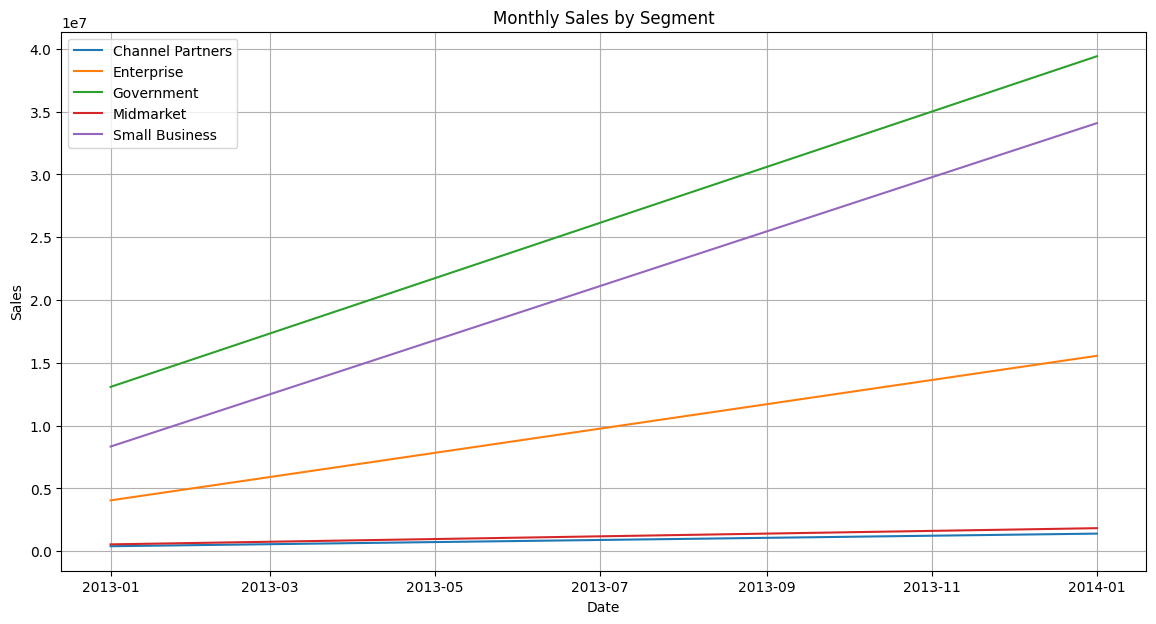

In [86]:
# Create a new dataframe with total monthly sales for each segment
monthly_segment_sales = df.groupby([df['Date'].dt.year, df['Date'].dt.month, 'Segment']).agg({'Sales': 'sum'})
monthly_segment_sales.index.names = ['Year', 'Month', 'Segment']
monthly_segment_sales.reset_index(inplace=True)

# Create a 'Year-Month' column for easier plotting
monthly_segment_sales['Year-Month'] = pd.to_datetime(monthly_segment_sales[['Year', 'Month']].assign(day=1))

# Plot monthly sales for each segment
plt.figure(figsize=(14, 7))
for segment in monthly_segment_sales['Segment'].unique():
    segment_data = monthly_segment_sales[monthly_segment_sales['Segment'] == segment]
    plt.plot(segment_data['Year-Month'], segment_data['Sales'], label=segment)
plt.title('Monthly Sales by Segment')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

The graph shows that sales of all segments increased over time, but the growth rate varied by segment. The segment with the highest growth rate is Government. The segment with the lowest growth rate is Channel Partners. Overall, the graph shows that the company experienced strong sales growth, particularly in the Government segment.